## Limpieza de los datos

### Importación BBDD de MySQL con archivo .CSV

In [1]:
import warnings
warnings.filterwarnings("ignore")

from dotenv import load_dotenv
import os
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import pandas as pd
import mysql.connector

In [2]:



nombre_documento = r'datos_3.csv'
df= pd.read_csv(nombre_documento, sep=',')
df

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2.0,1.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.0,1.0,...,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,47710189,Beautiful house in the centre in Santa Cristin...,Beautiful house in the center of Santa Cristin...,263841355,Santa Cristina d'Aro,NaN,Entire home/apt,8,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,spain,girona,31/01/2021
9996,47752964,Costa Brava - Palafrugell - playa y monta�a,Piso con acceso directo a piscina. Lugar muy t...,282214688,Palafrugell,NaN,Entire home/apt,7,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,FALSO,NaN,spain,girona,27/02/2021
9997,47792016,MODERN AND BRIGHT NEW FLAT IN THE CENTER OF PA...,Modern and new apartment in the old town of Pa...,263841355,Palam�s,NaN,Entire home/apt,6,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,spain,girona,31/01/2021
9998,47884481,MIT House Olavide III in Madrid,The apartment is in a characteristic building ...,377605855,Trafalgar,Chamber�,Entire home/apt,4,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,FALSO,NaN,spain,madrid,09/02/2021


### Contabilización datos dataset

In [3]:
# Número de registros df:
print(f'Número de registros en el dataset: {len(df)}')
print('\n')

# Número de duplicados exactos:
numero_de_duplicados_exactos = df.duplicated().sum()
print(f"El número de filas duplicadas exactas es: {numero_de_duplicados_exactos}")
print('\n')

# Número de duplicados por apartment_id:
numero_de_duplicados_por_fk = df.duplicated(subset='apartment_id').sum()
print(f'Número de duplicados por apartment_id es: {numero_de_duplicados_por_fk}')

# Total de valores nulos en todo el DataFrame
total_nulls = df.isnull().sum().sum()
print(f"Total de valores nulos en todo el dataset: {total_nulls}")

Número de registros en el dataset: 10000


El número de filas duplicadas exactas es: 0


Número de duplicados por apartment_id es: 350
Total de valores nulos en todo el dataset: 31909


### Eliminación de casos duplicados en la FK 'apartment_id': 

Creación de un df que solo contenga los casos duplicados para poderlos examinar

In [4]:
# Suponiendo que tu DataFrame se llama 'df'
df_duplicados = df[df.duplicated(subset=['apartment_id'], keep=False)].copy()

In [5]:
df_duplicados

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
22,144471,BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI,HELLO PEOPLE :=) are you on vacation? or busi...,700165,Sant Antoni,Eixample,Private room,2,1.0,1.0,...,90.0,90.0,90.0,90.0,80.0,FALSO,42.0,spain,barcelona,12/09/2017
23,144471,BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI,HELLO PEOPLE :=) are you on vacation? or busi...,700165,Sant Antoni,Eixample,Private room,2,1.0,1.0,...,90.0,90.0,90.0,90.0,80.0,FALSO,38.0,spain,barcelona,10/10/2018
24,157327,House in Llofriu (Costa Brava),New rebuilt and furnished house pool bbq If yo...,755634,Forallac,NaN,Entire home/apt,8,5.0,4.0,...,100.0,100.0,100.0,80.0,80.0,FALSO,2.0,spain,girona,30/04/2020
25,157327,House in Llofriu (Costa Brava),New rebuilt and furnished house pool bbq If yo...,755634,Forallac,NaN,Entire home/apt,8,5.0,4.0,...,100.0,100.0,100.0,80.0,80.0,FALSO,3.0,spain,girona,30/08/2018
50,343864,3 BD APT IN THE HEART OF GRACIA,A spacious and comfortable 3 bedrooms apartmen...,1744516,la Vila de Gr�cia,Gr�cia,Entire home/apt,6,2.0,3.0,...,100.0,100.0,90.0,100.0,90.0,FALSO,11.0,spain,barcelona,05/06/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9759,42922000,Hostal Bruselas Hab. #7 con ba�o privado y balc�n,Hostal Bruselas se encuentra en el Centro de M...,335917627,Centro,NaN,Private room,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,spain,malaga,30/11/2020
9788,43193627,Recoletos IX,"Consta de dos dormitorios, dos ba�os, un aseo ...",247570318,Recoletos,Salamanca,Entire home/apt,4,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,FALSO,NaN,spain,madrid,17/04/2020
9789,43193627,Recoletos IX,"Consta de dos dormitorios, dos ba�os, un aseo ...",247570318,Recoletos,Salamanca,Entire home/apt,4,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,FALSO,NaN,spain,madrid,06/11/2020
9852,43897607,Finca rural Els Ametllers,Hermosa Villa rural en Finca de almendros y ol...,351241882,Inca,NaN,Entire home/apt,8,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,spain,mallorca,19/09/2020


Para la eliminación de los casos duplicados en 'apartment_id' hemos usado la variable 'insert_date' quedandonos con la fecha más moderna y eliminando el resto de registros repetidos.

In [6]:
# Transformar la variable temporal a datetime especificando el formato
df['insert_date'] = pd.to_datetime(df['insert_date'], format='%d/%m/%Y')

# Ordena el DataFrame por 'apartment_id' y luego por 'insert_date' de forma descendente
df_ordenado = df.sort_values(by=['apartment_id', 'insert_date'], ascending=[True, False])

# Elimina los duplicados de 'apartment_id', quedándonos con el primero (el más reciente por el ordenamiento)
df_sin_duplicados = df_ordenado.drop_duplicates(subset=['apartment_id'], keep='first').copy()

# Si quieres resetear el índice del DataFrame resultante
df_sin_duplicados = df_sin_duplicados.reset_index(drop=True)

print(f"Tamaño del DataFrame original: {len(df)}")
print(f"Tamaño del DataFrame sin duplicados: {len(df_sin_duplicados)}")

Tamaño del DataFrame original: 10000
Tamaño del DataFrame sin duplicados: 9650


### Eliminación de datos nulls y transformación de variables:

#### Transformación de variables temporales:

In [7]:
# Convertir las variables temporales a datetime:
df_sin_duplicados['first_review_date'] = pd.to_datetime(df_sin_duplicados['first_review_date'], format='%d/%m/%Y')
df_sin_duplicados['last_review_date'] = pd.to_datetime(df_sin_duplicados['last_review_date'], format='%d/%m/%Y')

#### Transformación las variables 'bathrooms','bedrooms' y 'beds'
- Para poder poner las variables con el formato adecuado primero se ha hacer un tratamiendo de los datos nulls.
- Se ha imputado el valor de la mediana de los nulls usando otras variables como referencia para crear grupos homogeneos.

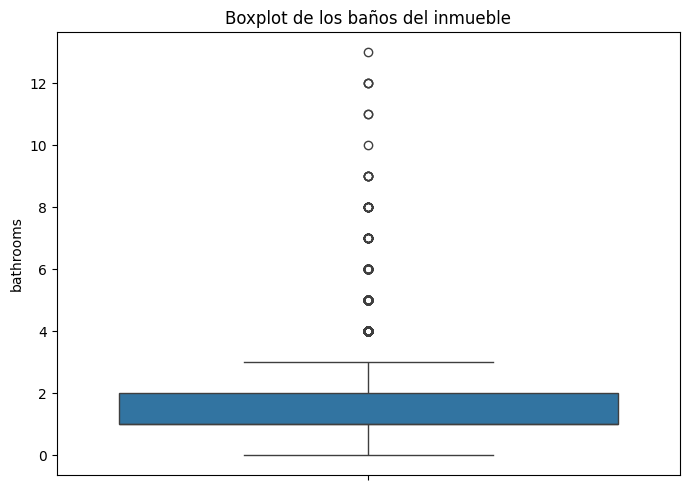

In [8]:
import matplotlib.pyplot as plt    
import seaborn as sns  

# Grafico boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_sin_duplicados['bathrooms'])
plt.xticks(rotation=45)
plt.title('Boxplot de los baños del inmueble')
plt.tight_layout()
plt.show()

In [9]:
import numpy as np

# Primero, convierte la columna 'bathrooms' a numérico, los errores se convierten a NaN
df_sin_duplicados['bathrooms'] = pd.to_numeric(df_sin_duplicados['bathrooms'], errors='coerce')

# Calcula la mediana de 'bathrooms' por cada número de 'accommodates'
mediana_bathrooms_por_accommodates = df_sin_duplicados.groupby('accommodates')['bathrooms'].median()

# Imputa los valores nulos en 'bathrooms' usando la mediana correspondiente al número de 'accommodates'
def imputar_bathrooms(row):
    if pd.isnull(row['bathrooms']):
        return mediana_bathrooms_por_accommodates.get(row['accommodates'], df_sin_duplicados['bathrooms'].median()) # Si no hay mediana para ese 'accommodates', usa la mediana general
    return row['bathrooms']

df_sin_duplicados['bathrooms'] = df_sin_duplicados.apply(imputar_bathrooms, axis=1)

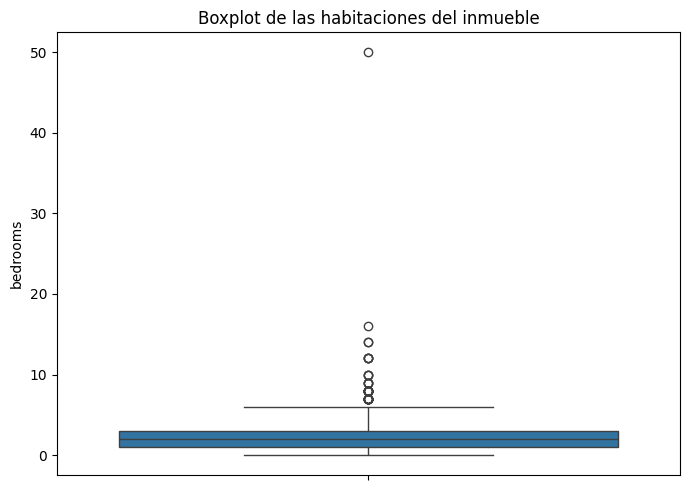

In [10]:
import matplotlib.pyplot as plt    
import seaborn as sns  

# Grafico boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_sin_duplicados['bedrooms'])
plt.xticks(rotation=45)
plt.title('Boxplot de las habitaciones del inmueble')
plt.tight_layout()
plt.show()

In [11]:
# Convertir la columna 'bedrooms' a numérico
df_sin_duplicados['bedrooms'] = pd.to_numeric(df_sin_duplicados['bedrooms'], errors='coerce')

# Calcular la mediana de 'bedrooms' por cada número de 'accommodates'
mediana_bedrooms_por_accommodates = df_sin_duplicados.groupby('accommodates')['bedrooms'].median()

# Imputar los valores nulos en 'bedrooms'
def imputar_bedrooms(row):
    if pd.isnull(row['bedrooms']):
        return mediana_bedrooms_por_accommodates.get(row['accommodates'], df_sin_duplicados['bedrooms'].median())
    return row['bedrooms']

df_sin_duplicados['bedrooms'] = df_sin_duplicados.apply(imputar_bedrooms, axis=1)

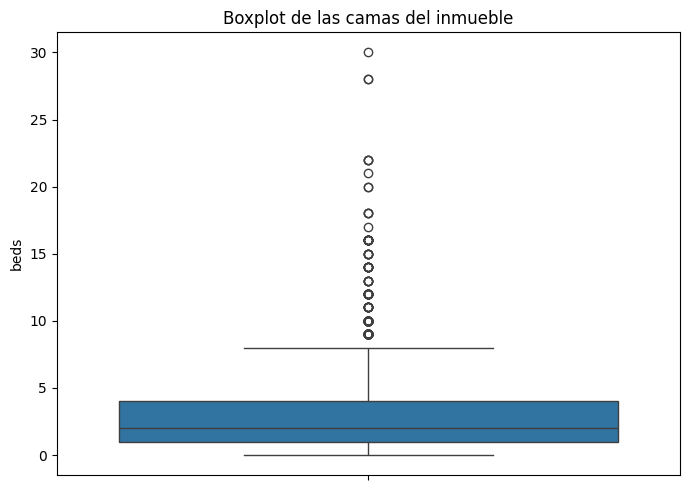

In [12]:
import matplotlib.pyplot as plt    
import seaborn as sns  

# Grafico boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_sin_duplicados['beds'])
plt.xticks(rotation=45)
plt.title('Boxplot de las camas del inmueble')
plt.tight_layout()
plt.show()

In [13]:
# Calcular la mediana de 'beds' por cada número de 'accommodates'
mediana_bedrooms_por_accommodates = df_sin_duplicados.groupby('accommodates')['beds'].median()

# Imputar los valores nulos en 'beds'
def imputar_bedrooms(row):
    if pd.isnull(row['beds']):
        return mediana_bedrooms_por_accommodates.get(row['accommodates'], df_sin_duplicados['beds'].median())
    return row['beds']

df_sin_duplicados['beds'] = df_sin_duplicados.apply(imputar_bedrooms, axis=1)

Para poder imputar en la variable 'price' un valor a los datos nulls se han usado las variables 'room_type' y 'city' para calcular la mediana de cada grupo y a esos grupos donde falta price se le ha aplicado la mediana que corresponde

### Imputación de valores en la variable 'price'

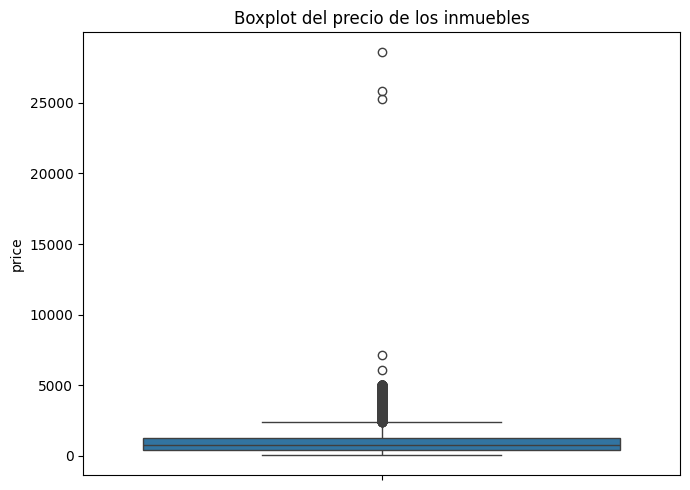

In [14]:
import matplotlib.pyplot as plt    
import seaborn as sns  

# Grafico boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_sin_duplicados['price'])
plt.xticks(rotation=45)
plt.title('Boxplot del precio de los inmuebles')
plt.tight_layout()
plt.show()

In [15]:
# Calcular la mediana de 'price' por 'city' y 'room_type'
mediana_price_por_city_roomtype = df_sin_duplicados.groupby(['city', 'room_type'])['price'].median()

# Función para imputar los valores nulos en 'price'
def imputar_price(row):
    if pd.isnull(row['price']):
        try:
            return mediana_price_por_city_roomtype[(row['city'], row['room_type'])]
        except KeyError:
            return df_sin_duplicados['price'].median() # Si no existe la combinación, usa la mediana general
    return row['price']

# Aplicar la imputación
df_sin_duplicados['price'] = df_sin_duplicados.apply(imputar_price, axis=1)

### Imputación de valores nulls en las variables score
 - La variable 'review_scores_rating' está en una escala diferente a las otras variables, así que he igualado su escala a la de las otras variables. Solo ejecutar el código 1 vez si no la escala se hace más pequeña que el resto. 
 - Esta variable es la de puntuación global. 

In [16]:
# Dividir entre 10 para ponerla en la misma escala que las otras variables
df_sin_duplicados['review_scores_rating'] = df_sin_duplicados['review_scores_rating'] / 10

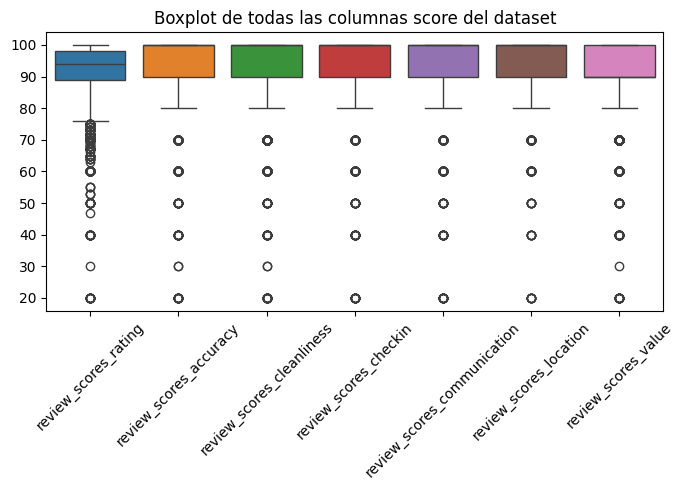

In [17]:
import matplotlib.pyplot as plt    
import seaborn as sns  

# Grafico boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_sin_duplicados.iloc[:, 23:30])
plt.xticks(rotation=45)
plt.title('Boxplot de todas las columnas score del dataset')
plt.tight_layout()
plt.show()

In [18]:
columnas_a_imputar = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                       'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                       'review_scores_value', 'reviews_per_month']

for columna in columnas_a_imputar:
    # Imputar con la mediana del grupo
    df_sin_duplicados[columna] = df_sin_duplicados.groupby(['city', 'room_type'])[columna].transform(lambda x: x.fillna(x.median()))
    # Imputar los nulos restantes con la mediana de la columna completa
    mediana_global = df_sin_duplicados[columna].median()
    df_sin_duplicados[columna] = df_sin_duplicados[columna].fillna(mediana_global)

# Verificar la cantidad de nulos después de la imputación
print(df_sin_duplicados[columnas_a_imputar].isnull().sum())

review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64


### Transformación variable has_availability todos los casos verdadero:

Hemos sustitudo 534 valores nulls imputandoles el valor True y hemos transformado el valor VERDADERO en True

In [19]:
# Transformar VERDADERO a True
df_sin_duplicados['has_availability'] = df_sin_duplicados['has_availability'].replace('VERDADERO', True)

# Imputacion a valores nulls por True
df_sin_duplicados['has_availability'].fillna(True, inplace=True)

### Datos nulls que siguen existiendo en el dataset:

In [20]:
# 1. Identificar filas con al menos un valor nulo:
df_sin_duplicados[df_sin_duplicados.isnull().any(axis=1)]

# 2. Obtener el número de valores nulos por columna y filtrar las que tienen al menos uno:
nulos_por_columna = df_sin_duplicados.isnull().sum()

# 3. Eliminar las variables que no tienen nulls de la visualizacion:
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]
print("\nNúmero de valores nulos por columna (solo las que tienen nulos):")
print(columnas_con_nulos)


Número de valores nulos por columna (solo las que tienen nulos):
name                         3
description                134
neighbourhood_district    3790
amenities_list              16
first_review_date         2522
last_review_date          2523
dtype: int64


### Transformación nombre dataset para crear archivo .csv y poder importar el documento en PowerBi

In [21]:
# Cambio del nombre del dataset
#df_tourist = df_sin_duplicados

#Exportar el nuevo df como .csv
#nombre_archivo_csv = 'df_tourist.csv'
#df_tourist.to_csv(nombre_archivo_csv, index=False, encoding='utf-8')

# Mensaje sobre la operación realizada
#print(f"El DataFrame se ha guardado exitosamente en '{nombre_archivo_csv}'")

importamos librerias:

In [22]:
import warnings
warnings.filterwarnings("ignore")

from dotenv import load_dotenv
from scipy.stats import shapiro
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd


Cambiamos nombre al DF

In [23]:
df= df_sin_duplicados
df

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2.0,1.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,2018-07-31
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.0,1.0,...,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,2020-01-10
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,2019-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,47710189,Beautiful house in the centre in Santa Cristin...,Beautiful house in the center of Santa Cristin...,263841355,Santa Cristina d'Aro,NaN,Entire home/apt,8,2.0,4.0,...,100.0,100.0,100.0,100.0,90.0,VERDADERO,25.0,spain,girona,2021-01-31
9646,47752964,Costa Brava - Palafrugell - playa y monta�a,Piso con acceso directo a piscina. Lugar muy t...,282214688,Palafrugell,NaN,Entire home/apt,7,2.0,3.0,...,100.0,100.0,100.0,100.0,90.0,FALSO,25.0,spain,girona,2021-02-27
9647,47792016,MODERN AND BRIGHT NEW FLAT IN THE CENTER OF PA...,Modern and new apartment in the old town of Pa...,263841355,Palam�s,NaN,Entire home/apt,6,1.0,3.0,...,100.0,100.0,100.0,100.0,90.0,VERDADERO,25.0,spain,girona,2021-01-31
9648,47884481,MIT House Olavide III in Madrid,The apartment is in a characteristic building ...,377605855,Trafalgar,Chamber�,Entire home/apt,4,1.0,1.0,...,100.0,100.0,100.0,100.0,90.0,FALSO,105.0,spain,madrid,2021-02-09


In [24]:
df.describe().round(2)

,apartment_id,host_id,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,...,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,insert_date
count,9650.00,9.650000e+03,9650.00,9650.00,9650.00,9650.00,9650.00,9650.00,9650.00,9650.00,...,7127,9650.00,9650.00,9650.00,9650.00,9650.00,9650.00,9650.00,9650.00,9650
mean,21224726.91,9.096714e+07,4.27,1.59,1.93,2.91,1020.64,4.97,758.33,13.05,...,2019-01-19 08:42:29.852672768,92.51,95.96,94.20,97.25,97.23,96.66,91.25,106.01,2019-07-26 22:20:28.103627008
min,11964.00,1.070400e+04,1.00,0.00,0.00,0.00,60.00,1.00,1.00,0.00,...,2012-11-17 00:00:00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,1.00,2017-01-04 00:00:00
25%,13320956.25,1.506455e+07,2.00,1.00,1.00,1.00,450.00,1.00,61.00,0.00,...,2018-06-21 00:00:00,91.00,90.00,90.00,100.00,100.00,90.00,90.00,25.00,2018-11-07 00:00:00
50%,20656122.50,6.569780e+07,4.00,1.00,2.00,2.00,750.00,2.00,1125.00,11.00,...,2019-04-21 00:00:00,94.00,100.00,100.00,100.00,100.00,100.00,90.00,59.00,2019-08-31 00:00:00
75%,30169327.75,1.429782e+08,6.00,2.00,3.00,4.00,1250.00,4.00,1125.00,26.00,...,2019-11-04 00:00:00,97.00,100.00,100.00,100.00,100.00,100.00,100.00,123.00,2020-05-14 00:00:00
max,48061552.00,3.874783e+08,29.00,13.00,50.00,30.00,28571.00,1125.00,1125.00,30.00,...,2021-02-21 00:00:00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,1273.00,2021-02-27 00:00:00
std,11617925.91,8.717483e+07,2.59,0.99,1.37,2.27,967.31,17.99,498.81,11.87,...,NaN,8.06,8.49,9.15,7.31,7.34,6.87,8.68,135.46,NaN


### Variabilidad/distribución variable precio:

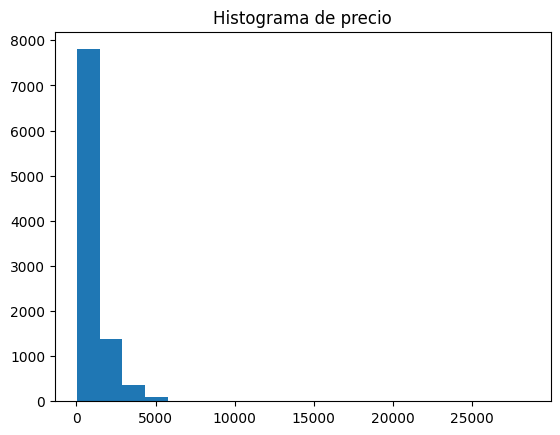

In [25]:
# Ajustamos la escala del eje Y para mostrar números completos ( sin notación cientifica por default)
plt.ticklabel_format(style='plain', axis='y')


plt.title('Histograma de precio')
plt.hist(df['price'], bins=20)
plt.show()

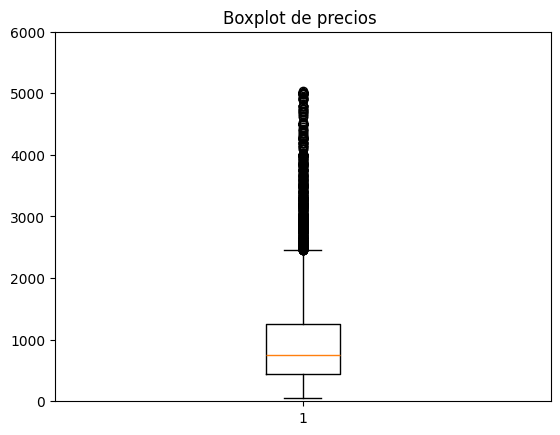

In [26]:
plt.boxplot(df['price'].dropna()) # quitamos los nan para evitar anomalias 
plt.ylim(0, 6000)  # Ajustamos los límites según los valores del dataset
plt.title('Boxplot de precios ')
plt.show()


### Limpieza de datos utilizando el IQR

Identificación/tratamiento de Outliers:

In [27]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para mantener solo los valores dentro de los límites
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Volvemos a graficar la variable trás el tratamiento de los Outliers


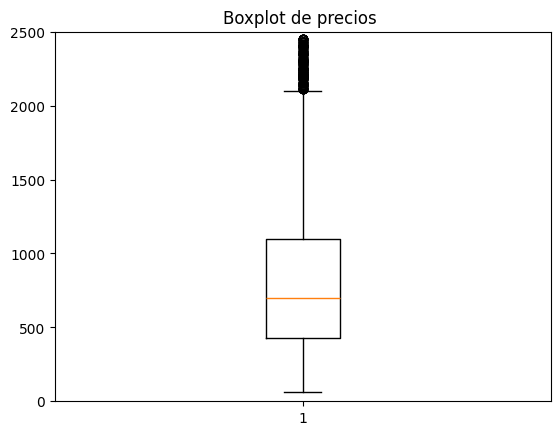

In [28]:
plt.boxplot(df_filtered['price'].dropna()) # quitamos los nan para evitar anomalias 
plt.ylim(0, 2500)  # Ajustamos los límites según los valores del dataset
plt.title('Boxplot de precios ')
plt.show()

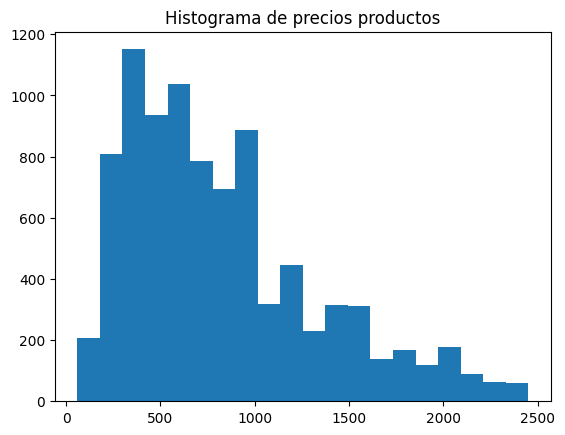

In [29]:
# Ajustamos la escala del eje Y para mostrar números completos ( sin notación cientifica por default)
plt.ticklabel_format(style='plain', axis='y')


# Histograma 
plt.title('Histograma de precios productos')
plt.hist(df_filtered['price'], bins=20)
plt.show()

In [30]:
df_filtered['price'].describe().round(2)

count    8947.00
mean      826.14
std       511.25
min        60.00
25%       430.00
50%       700.00
75%      1100.00
max      2450.00
Name: price, dtype: float64

In [31]:
df[['price']].var().round(2)

price    935682.36
dtype: float64

Verificamos dispersión de la variable price

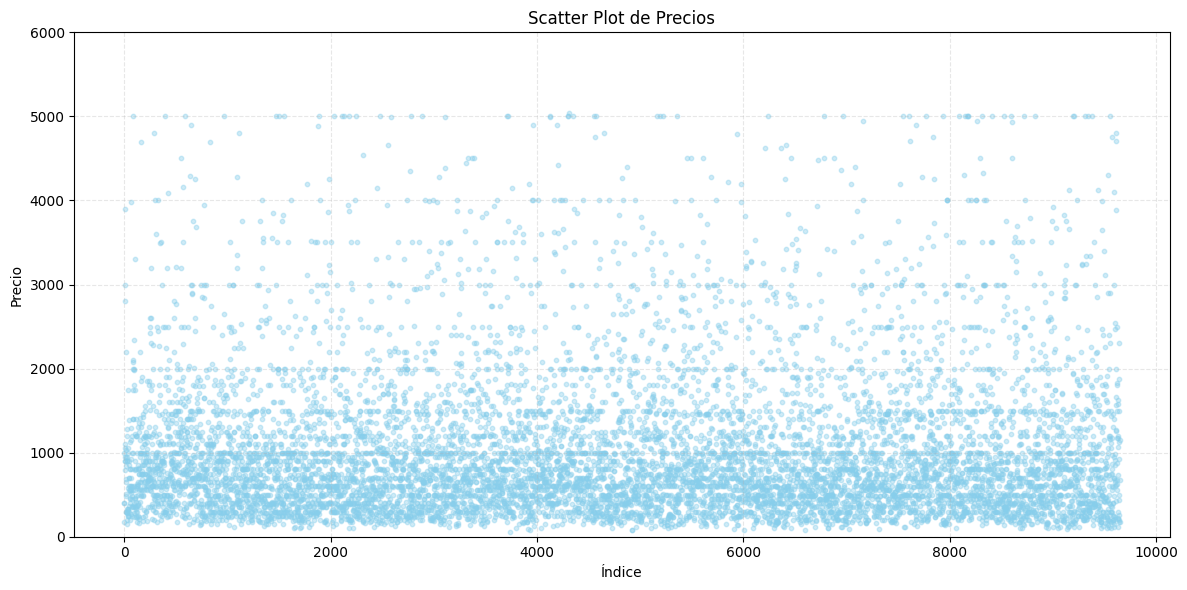

In [32]:
# Eliminamos los NaN
price_nonan = df['price'].dropna()

plt.figure(figsize=(12, 6))
plt.scatter(price_nonan.index, price_nonan, alpha=0.4, color='skyblue', s=10)
plt.ylim(0, 6000)
plt.title('Scatter Plot de Precios')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


### Boxplot availability 

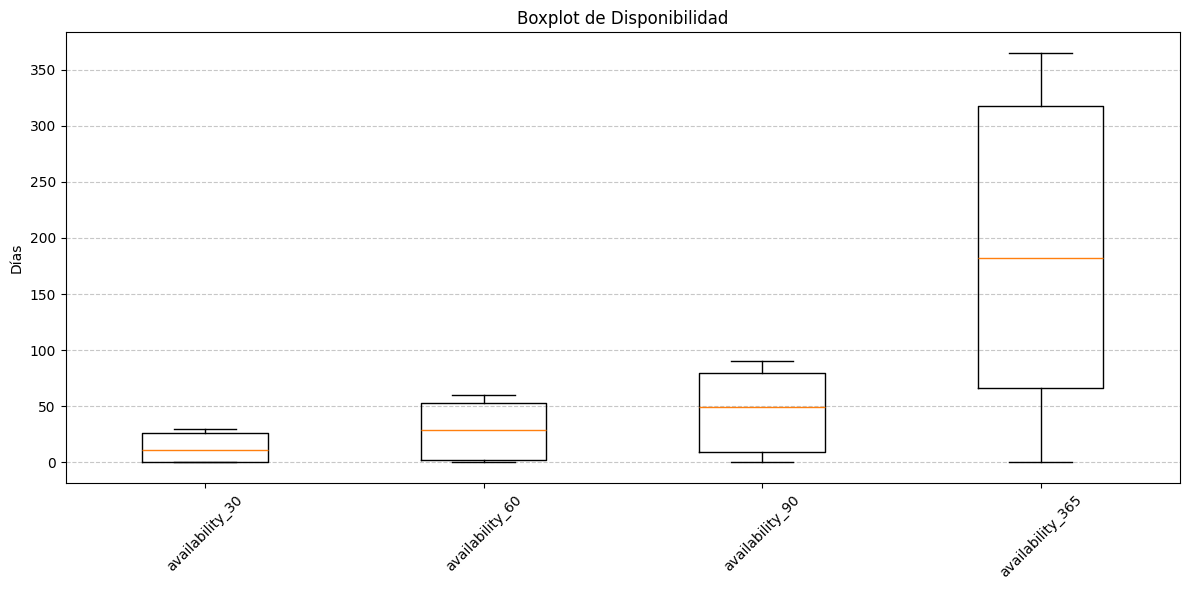

In [33]:
# Lista de variables
variables = ['availability_30', 'availability_60', 'availability_90', 'availability_365']

# Crear el boxplot
plt.figure(figsize=(12, 6))
plt.boxplot([df[var].dropna() for var in variables], labels=variables)
plt.title('Boxplot de Disponibilidad')
plt.ylabel('Días')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## EDA Operaciones

In [34]:
df

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2.0,1.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,2018-07-31
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.0,1.0,...,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,2020-01-10
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,2019-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,47710189,Beautiful house in the centre in Santa Cristin...,Beautiful house in the center of Santa Cristin...,263841355,Santa Cristina d'Aro,NaN,Entire home/apt,8,2.0,4.0,...,100.0,100.0,100.0,100.0,90.0,VERDADERO,25.0,spain,girona,2021-01-31
9646,47752964,Costa Brava - Palafrugell - playa y monta�a,Piso con acceso directo a piscina. Lugar muy t...,282214688,Palafrugell,NaN,Entire home/apt,7,2.0,3.0,...,100.0,100.0,100.0,100.0,90.0,FALSO,25.0,spain,girona,2021-02-27
9647,47792016,MODERN AND BRIGHT NEW FLAT IN THE CENTER OF PA...,Modern and new apartment in the old town of Pa...,263841355,Palam�s,NaN,Entire home/apt,6,1.0,3.0,...,100.0,100.0,100.0,100.0,90.0,VERDADERO,25.0,spain,girona,2021-01-31
9648,47884481,MIT House Olavide III in Madrid,The apartment is in a characteristic building ...,377605855,Trafalgar,Chamber�,Entire home/apt,4,1.0,1.0,...,100.0,100.0,100.0,100.0,90.0,FALSO,105.0,spain,madrid,2021-02-09


Crear dataset Operaciones

In [35]:
df_op = df[['apartment_id','host_id','country','city','neighbourhood_name','neighbourhood_district','accommodates','room_type','description','amenities_list','beds','bedrooms','bathrooms','minimum_nights','maximum_nights','is_instant_bookable','availability_30','availability_60','availability_90','availability_365','price','insert_date']]

df_op

,apartment_id,host_id,country,city,neighbourhood_name,neighbourhood_district,accommodates,room_type,description,amenities_list,...,bathrooms,minimum_nights,maximum_nights,is_instant_bookable,availability_30,availability_60,availability_90,availability_365,price,insert_date
0,11964,45553,spain,malaga,Centro,NaN,2,Private room,Private bedroom in our attic apartment. Right ...,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",...,2.0,3,365,FALSO,7,20,40,130,400.0,2018-07-31
1,21853,83531,spain,madrid,C�rmenes,Latina,1,Private room,We have a quiet and sunny room with a good vie...,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",...,1.0,4,40,FALSO,0,0,0,162,170.0,2020-01-10
2,32347,139939,spain,sevilla,San Vicente,Casco Antiguo,4,Entire home/apt,Open French doors and step onto a plant-filled...,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",...,1.0,2,120,VERDADERO,26,31,31,270,990.0,2019-07-29
3,35379,152232,spain,barcelona,l'Antiga Esquerra de l'Eixample,Eixample,2,Private room,Room at a my apartment. Kitchen and 2 bathroom...,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",...,2.0,2,730,VERDADERO,9,23,49,300,400.0,2020-01-10
4,35801,153805,spain,girona,Quart,NaN,5,Private room,Lay in bed & watch sunlight change the mood of...,"Wifi,Pool,Free parking on premises,Breakfast,P...",...,1.0,1,180,FALSO,0,19,49,312,900.0,2019-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,47710189,263841355,spain,girona,Santa Cristina d'Aro,NaN,8,Entire home/apt,Beautiful house in the center of Santa Cristin...,"Essentials, Iron, Heating, Pool, Air condition...",...,2.0,1,365,VERDADERO,0,0,0,31,1880.0,2021-01-31
9646,47752964,282214688,spain,girona,Palafrugell,NaN,7,Entire home/apt,Piso con acceso directo a piscina. Lugar muy t...,"Wifi, Bathtub, Free parking on premises, BBQ g...",...,2.0,1,1125,FALSO,29,59,89,364,1130.0,2021-02-27
9647,47792016,263841355,spain,girona,Palam�s,NaN,6,Entire home/apt,Modern and new apartment in the old town of Pa...,"Essentials, Wifi, Air conditioning, Dishes and...",...,1.0,1,365,VERDADERO,0,0,0,69,1150.0,2021-01-31
9648,47884481,377605855,spain,madrid,Trafalgar,Chamber�,4,Entire home/apt,The apartment is in a characteristic building ...,"Patio or balcony, Bed linens, Coffee maker, Wa...",...,1.0,1,365,FALSO,16,46,76,351,670.0,2021-02-09


Crear nuevas columnas ( mes, año, trimestre)

In [36]:
# Create new columns
df_op['month'] = df_op['insert_date'].dt.month  # Numeric month (1-12)
df_op['month_name'] = df_op['insert_date'].dt.month_name()  # Name of the month
df_op['quarter'] = df_op['insert_date'].dt.quarter  # Quarter (1-4)
df_op['year'] = df_op['insert_date'].dt.year  # Year


In [37]:
df_op

,apartment_id,host_id,country,city,neighbourhood_name,neighbourhood_district,accommodates,room_type,description,amenities_list,...,availability_30,availability_60,availability_90,availability_365,price,insert_date,month,month_name,quarter,year
0,11964,45553,spain,malaga,Centro,NaN,2,Private room,Private bedroom in our attic apartment. Right ...,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",...,7,20,40,130,400.0,2018-07-31,7,July,3,2018
1,21853,83531,spain,madrid,C�rmenes,Latina,1,Private room,We have a quiet and sunny room with a good vie...,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",...,0,0,0,162,170.0,2020-01-10,1,January,1,2020
2,32347,139939,spain,sevilla,San Vicente,Casco Antiguo,4,Entire home/apt,Open French doors and step onto a plant-filled...,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",...,26,31,31,270,990.0,2019-07-29,7,July,3,2019
3,35379,152232,spain,barcelona,l'Antiga Esquerra de l'Eixample,Eixample,2,Private room,Room at a my apartment. Kitchen and 2 bathroom...,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",...,9,23,49,300,400.0,2020-01-10,1,January,1,2020
4,35801,153805,spain,girona,Quart,NaN,5,Private room,Lay in bed & watch sunlight change the mood of...,"Wifi,Pool,Free parking on premises,Breakfast,P...",...,0,19,49,312,900.0,2019-02-19,2,February,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,47710189,263841355,spain,girona,Santa Cristina d'Aro,NaN,8,Entire home/apt,Beautiful house in the center of Santa Cristin...,"Essentials, Iron, Heating, Pool, Air condition...",...,0,0,0,31,1880.0,2021-01-31,1,January,1,2021
9646,47752964,282214688,spain,girona,Palafrugell,NaN,7,Entire home/apt,Piso con acceso directo a piscina. Lugar muy t...,"Wifi, Bathtub, Free parking on premises, BBQ g...",...,29,59,89,364,1130.0,2021-02-27,2,February,1,2021
9647,47792016,263841355,spain,girona,Palam�s,NaN,6,Entire home/apt,Modern and new apartment in the old town of Pa...,"Essentials, Wifi, Air conditioning, Dishes and...",...,0,0,0,69,1150.0,2021-01-31,1,January,1,2021
9648,47884481,377605855,spain,madrid,Trafalgar,Chamber�,4,Entire home/apt,The apartment is in a characteristic building ...,"Patio or balcony, Bed linens, Coffee maker, Wa...",...,16,46,76,351,670.0,2021-02-09,2,February,1,2021


In [38]:
df_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   apartment_id            9650 non-null   int64         
 1   host_id                 9650 non-null   int64         
 2   country                 9650 non-null   object        
 3   city                    9650 non-null   object        
 4   neighbourhood_name      9650 non-null   object        
 5   neighbourhood_district  5860 non-null   object        
 6   accommodates            9650 non-null   int64         
 7   room_type               9650 non-null   object        
 8   description             9516 non-null   object        
 9   amenities_list          9634 non-null   object        
 10  beds                    9650 non-null   float64       
 11  bedrooms                9650 non-null   float64       
 12  bathrooms               9650 non-null   float64 

In [39]:
df_op.describe().round(2)

,apartment_id,host_id,accommodates,beds,bedrooms,bathrooms,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,price,insert_date,month,quarter,year
count,9650.00,9.650000e+03,9650.00,9650.00,9650.00,9650.00,9650.00,9650.00,9650.00,9650.00,9650.00,9650.00,9650.00,9650,9650.00,9650.00,9650.00
mean,21224726.91,9.096714e+07,4.27,2.91,1.93,1.59,4.97,758.33,13.05,28.80,46.14,187.62,1020.64,2019-07-26 22:20:28.103627008,6.46,2.49,2019.07
min,11964.00,1.070400e+04,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,60.00,2017-01-04 00:00:00,1.00,1.00,2017.00
25%,13320956.25,1.506455e+07,2.00,1.00,1.00,1.00,1.00,61.00,0.00,2.00,9.00,66.00,450.00,2018-11-07 00:00:00,3.00,1.00,2018.00
50%,20656122.50,6.569780e+07,4.00,2.00,2.00,1.00,2.00,1125.00,11.00,29.00,49.00,182.00,750.00,2019-08-31 00:00:00,6.00,2.00,2019.00
75%,30169327.75,1.429782e+08,6.00,4.00,3.00,2.00,4.00,1125.00,26.00,53.00,80.00,318.00,1250.00,2020-05-14 00:00:00,10.00,4.00,2020.00
max,48061552.00,3.874783e+08,29.00,30.00,50.00,13.00,1125.00,1125.00,30.00,60.00,90.00,365.00,28571.00,2021-02-27 00:00:00,12.00,4.00,2021.00
std,11617925.91,8.717483e+07,2.59,2.27,1.37,0.99,17.99,498.81,11.87,23.04,33.84,130.99,967.31,NaN,3.55,1.14,1.04


In [40]:
df_op['accommodates'].var()

np.float64(6.705505459235756)

In [41]:
df_op['accommodates'].mode()

0    2
Name: accommodates, dtype: int64

In [42]:
df_op['minimum_nights'].mode()

0    1
Name: minimum_nights, dtype: int64

In [43]:
df_op['maximum_nights'].mode()

0    1125
Name: maximum_nights, dtype: int64

Boxplot e Histogramas de la variable accommodates

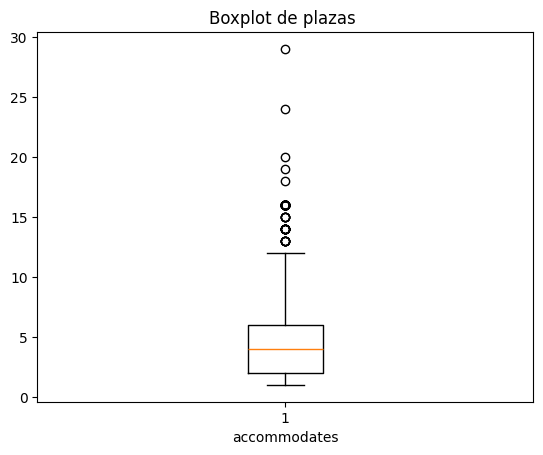

In [44]:
plt.boxplot(df_op['accommodates'])
plt.title('Boxplot de plazas ')
plt.xlabel('accommodates')
plt.show()

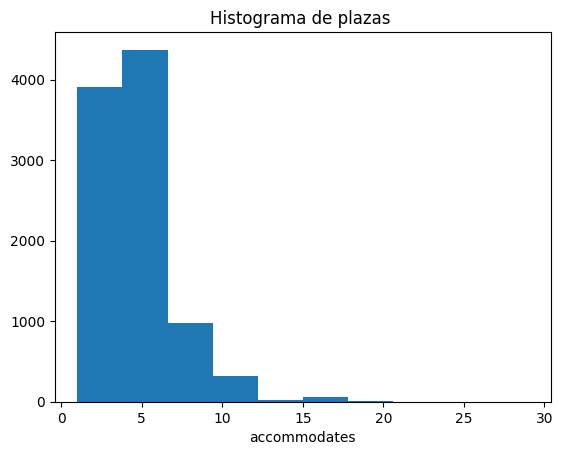

In [45]:
plt.hist(df_op['accommodates'])
plt.title('Histograma de plazas ')
plt.xlabel('accommodates')
plt.show()

Boxplots de numero de Camas, Dormitorios y Baños

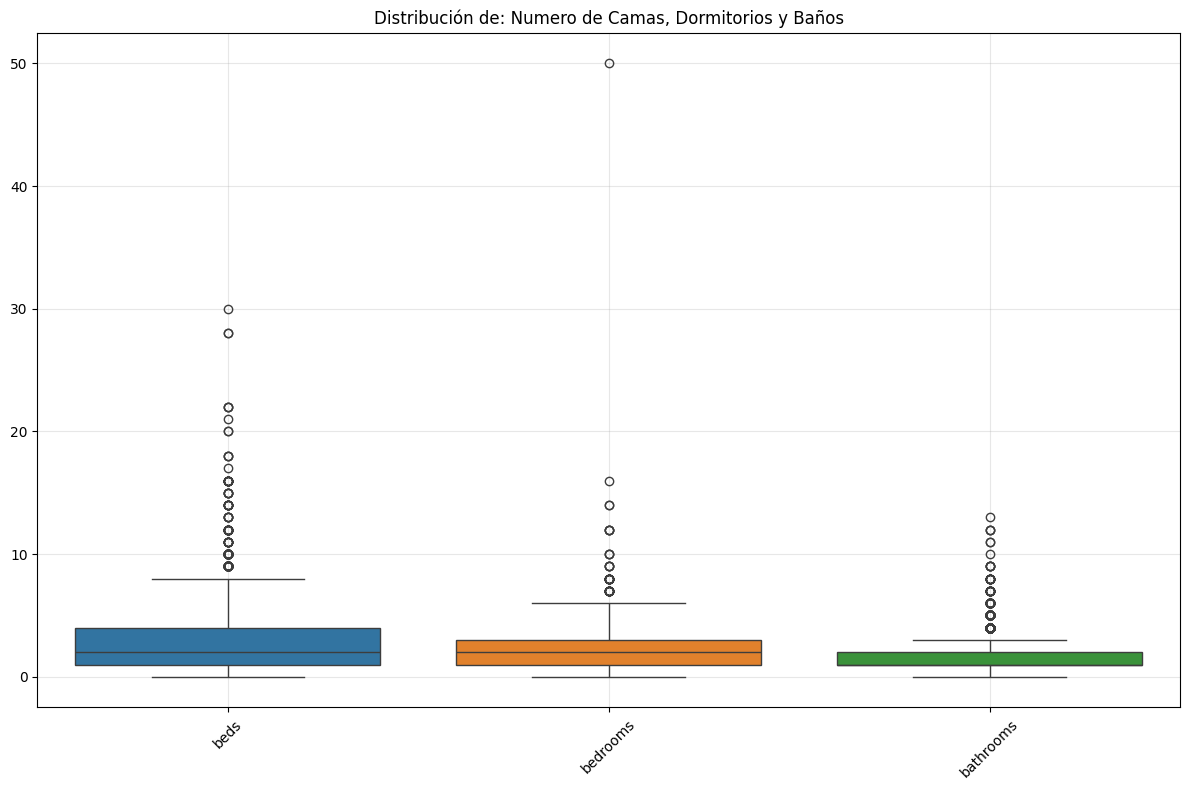

In [46]:


plt.figure(figsize=(12, 8))
sns.boxplot(data=df_op[[ 'beds', 'bedrooms', 'bathrooms']])
plt.title('Distribución de: Numero de Camas, Dormitorios y Baños')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Histogramas de Camas, Dormitorios y Baños

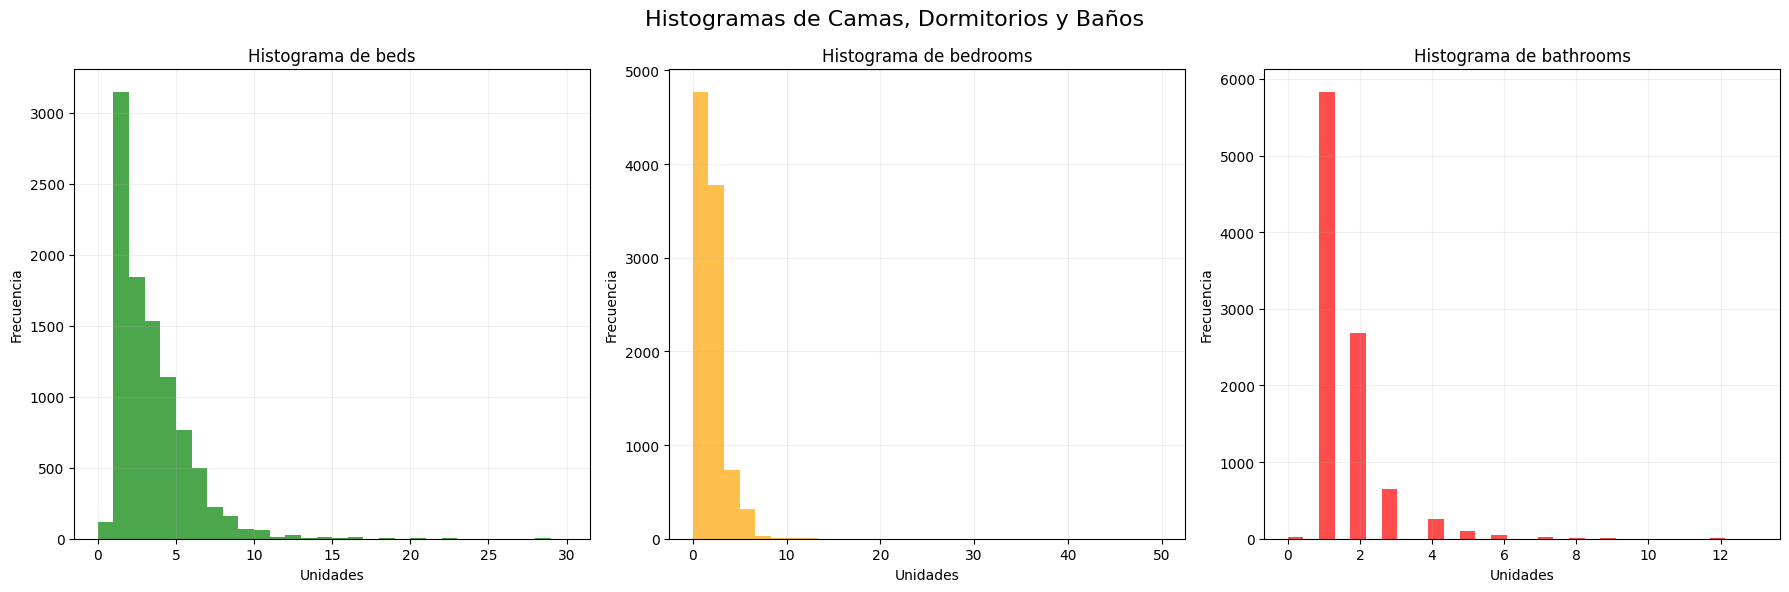

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

variables = ['beds', 'bedrooms', 'bathrooms']
colors = ['green', 'orange', 'red']

for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(df_op[var], bins=30, color=colors[i], alpha=0.7)
    ax.set_title(f'Histograma de {var}')
    ax.grid(alpha=0.2)
    ax.set_xlabel('Unidades')
    ax.set_ylabel('Frecuencia')

plt.suptitle('Histogramas de Camas, Dormitorios y Baños', fontsize=16)
plt.tight_layout()
plt.show()


Averiguar distribución normal de las variables

In [48]:
from scipy.stats import shapiro

# Seleccionar las columnas de interés
columns_to_test = ['accommodates', 'beds', 'bedrooms', 'bathrooms']

# Iterar sobre las columnas y realizar el Shapiro-Wilk Test
for col in columns_to_test:
    stat, p_value = shapiro(df_op[col])
    print(f"{col}: W-statistic = {stat:.4f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"La variable {col} no sigue una distribución normal")
    else:
        print(f"La variable {col} sigue una distribución normal")
    print('-' * 50)


accommodates: W-statistic = 0.8851, p-value = 0.0000
La variable accommodates no sigue una distribución normal
--------------------------------------------------
beds: W-statistic = 0.8018, p-value = 0.0000
La variable beds no sigue una distribución normal
--------------------------------------------------
bedrooms: W-statistic = 0.7285, p-value = 0.0000
La variable bedrooms no sigue una distribución normal
--------------------------------------------------
bathrooms: W-statistic = 0.6323, p-value = 0.0000
La variable bathrooms no sigue una distribución normal
--------------------------------------------------


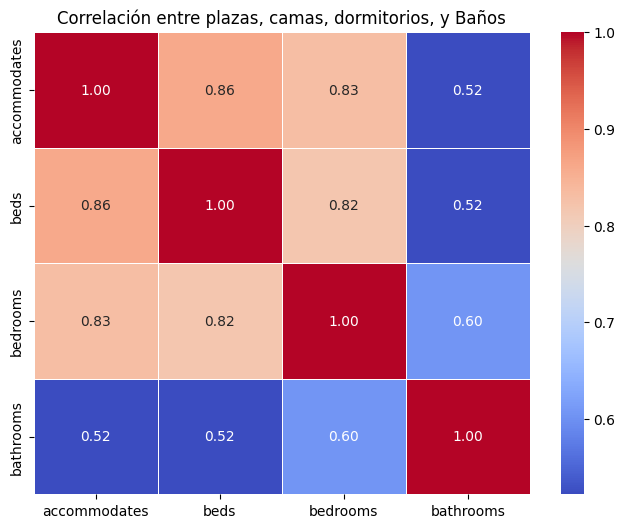

In [49]:


# Selecciona las columnas numéricas de interés
correlation_columns = ['accommodates', 'beds', 'bedrooms', 'bathrooms']

# Calcula la matriz de correlación
corr_matrix = df_op[correlation_columns].corr(method='spearman')

# Graficar el heatmap de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlación entre plazas, camas, dormitorios, y Baños')
plt.show()


Distribución de la variable room_type

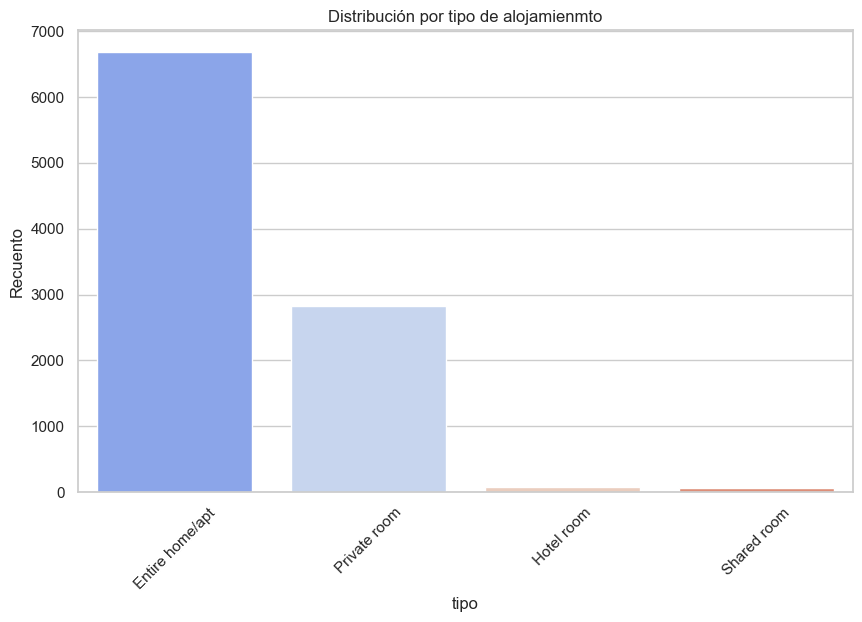

In [50]:


# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Distribución de room_type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_op, x='room_type', palette='coolwarm', order=df_op['room_type'].value_counts().index)
plt.title('Distribución por tipo de alojamienmto')
plt.xticks(rotation=45)
plt.xlabel('tipo')
plt.ylabel('Recuento')
plt.show()


Comparación de room_type con Variables Numéricas (Boxplot):
vemos cómo se distribuyen accommodates, beds y bathrooms por tipo de Alojamiento:

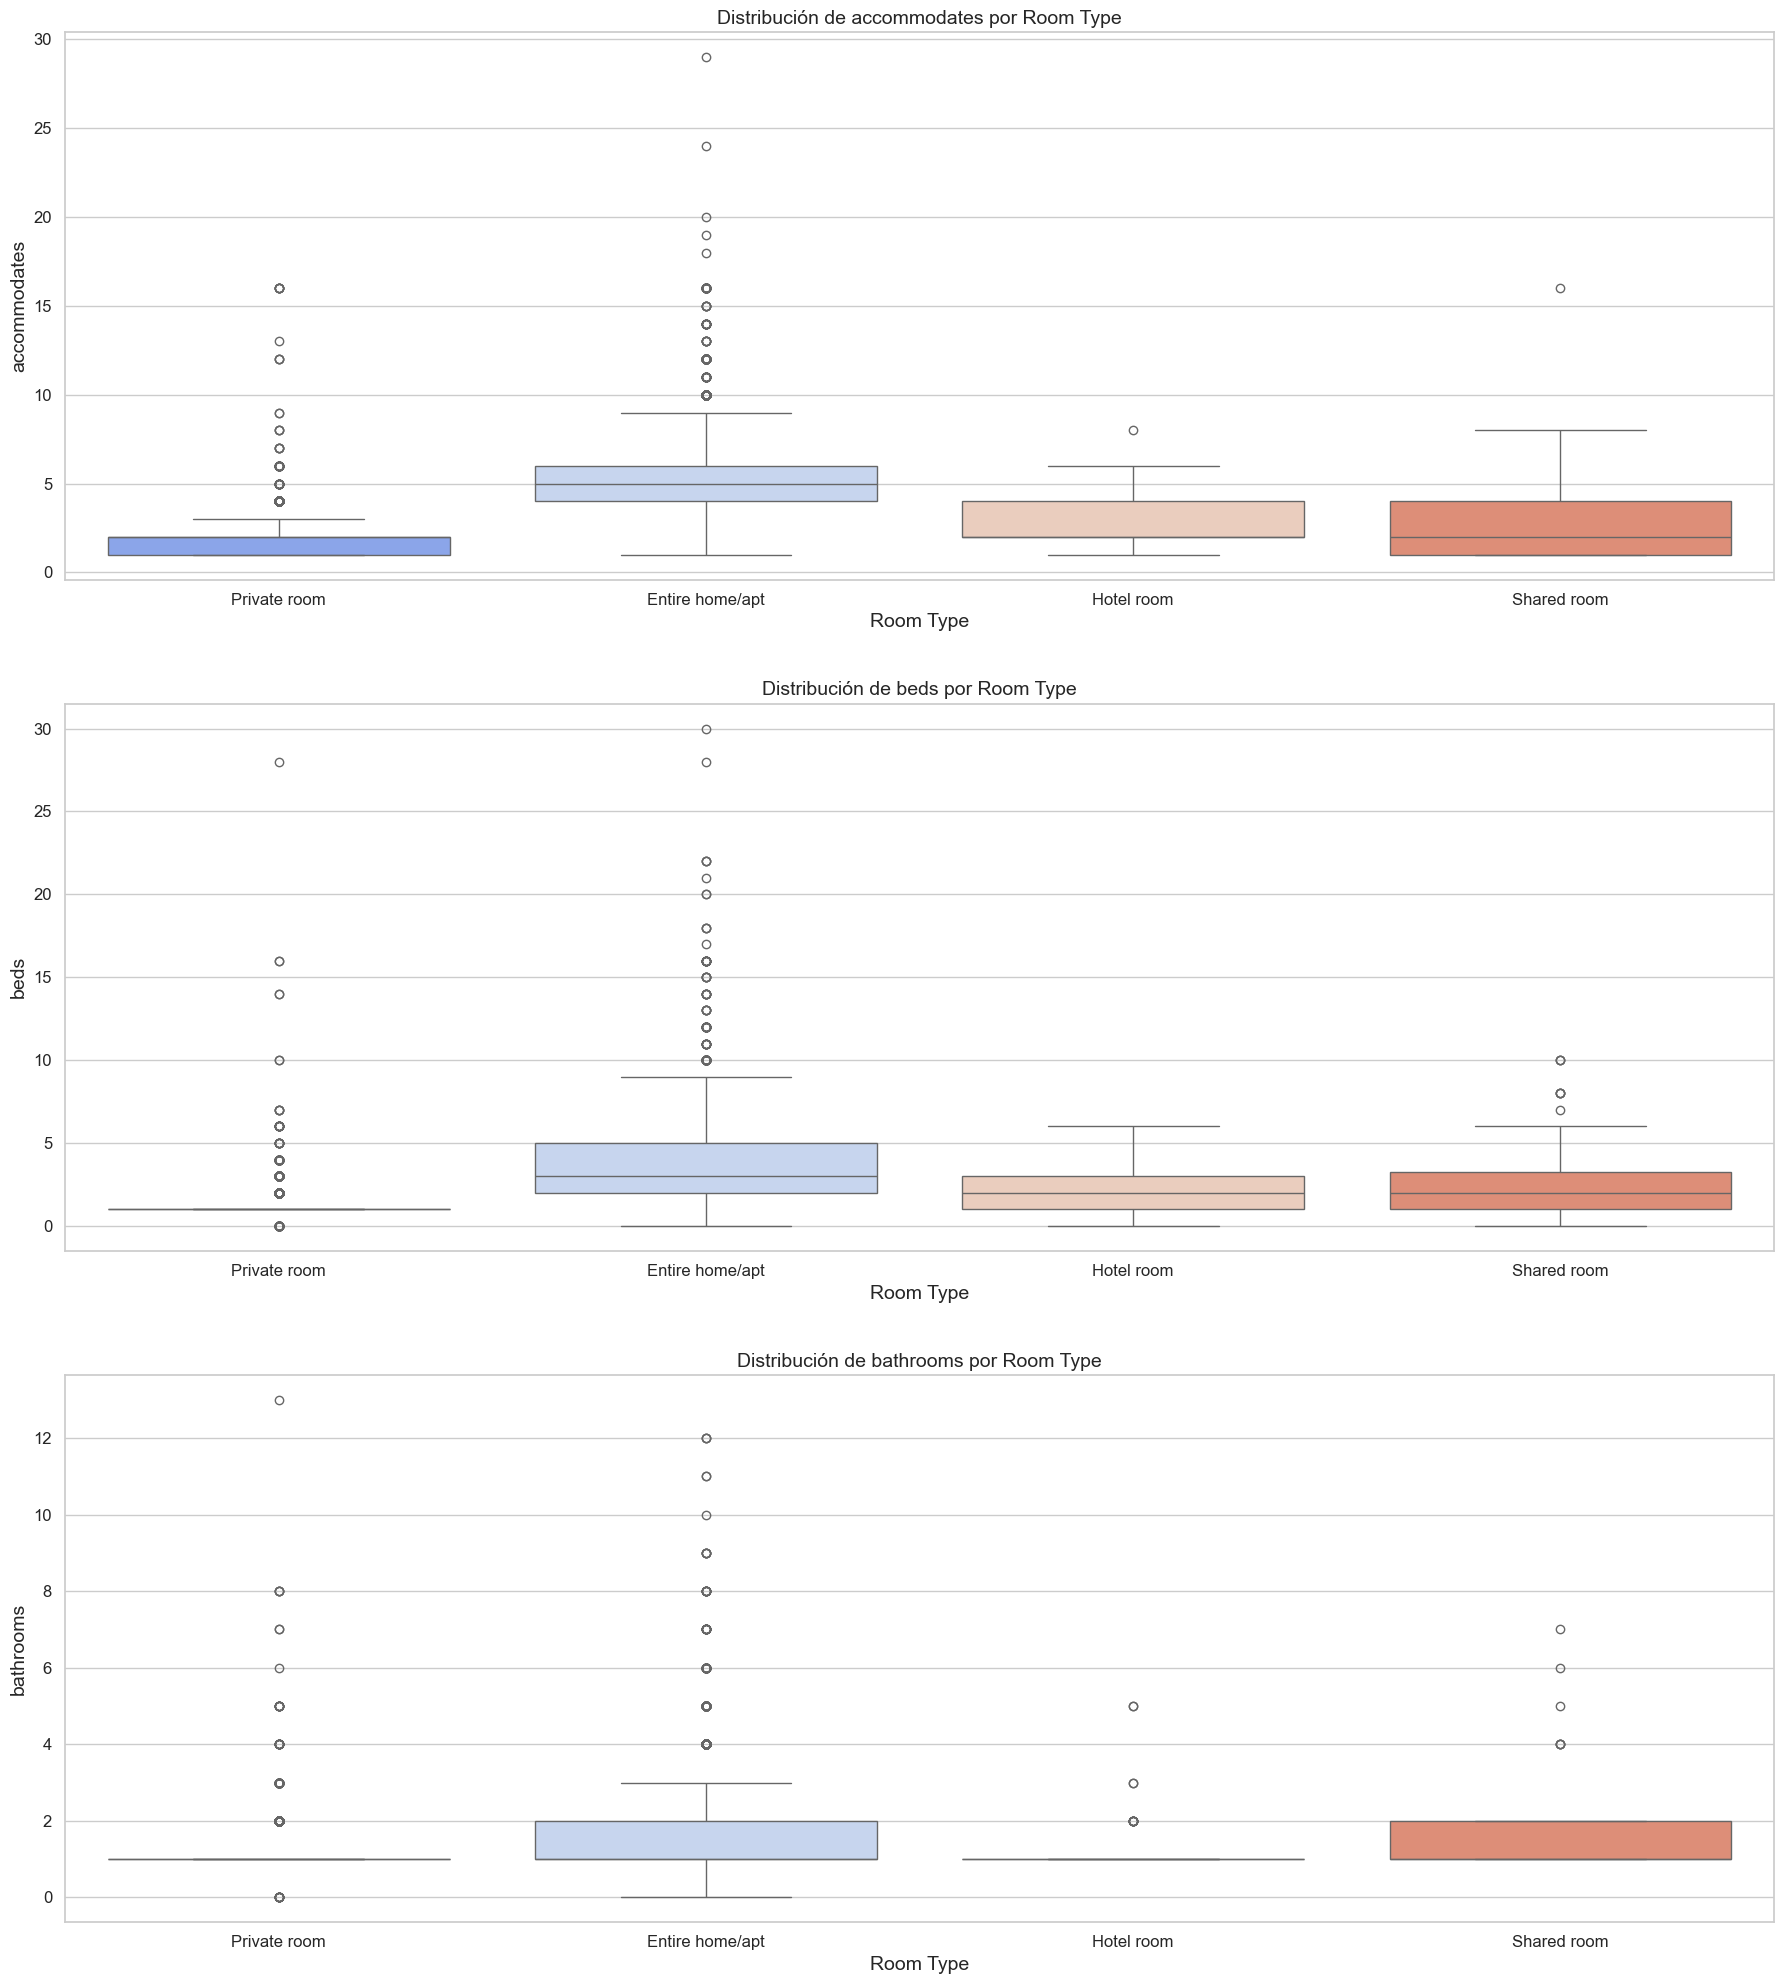

In [51]:
# Variables numéricas a comparar
num_vars = ['accommodates', 'beds', 'bathrooms']

# Ajuste del tamaño del gráfico 
plt.figure(figsize=(18, 20))  

for i, var in enumerate(num_vars, 1):
    plt.subplot(len(num_vars), 1, i)
    sns.boxplot(data=df_op, x='room_type', y=var, palette='coolwarm')
    plt.title(f'Distribución de {var} por Room Type', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Room Type', fontsize=14)
    plt.ylabel(var, fontsize=14)
    plt.tight_layout(h_pad=3)  

plt.show()


Conteo de tipo de alojamiento por ciudad

In [52]:


# Agrupar por 'city' y 'room_type' para obtener el conteo
room_city_count = df_op.groupby(['city', 'room_type']).size().reset_index(name='count')

# Crear el gráfico de barras apiladas
fig = px.bar(room_city_count, x='city', y='count', color='room_type', 
             title='Recuento de tipo de alojamiento por Ciudad', 
             labels={'city': 'City'}, 
             height=600, barmode='stack')

# Configurar el gráfico
fig.update_layout(xaxis_title='Ciudad', yaxis_title='Conteo', xaxis_tickangle=45)

fig.show()


Numero de Alojamientos registrados por Día

In [53]:
# Contar alojamientos por día
alojamientos_por_dia = df_op['insert_date'].dt.date.value_counts().sort_index()

# Crear DataFrame para Plotly
df_dia = alojamientos_por_dia.reset_index()
df_dia.columns = ['Fecha', 'Cantidad']

fig = px.line(df_dia, x='Fecha', y='Cantidad', 
              title='Numero de Alojamientos registrados por Día',
              markers=True,
              template='plotly_dark')
fig.update_layout(xaxis_title='Fecha', yaxis_title='Cantidad de Alojamientos')
fig.show()

In [54]:
df_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   apartment_id            9650 non-null   int64         
 1   host_id                 9650 non-null   int64         
 2   country                 9650 non-null   object        
 3   city                    9650 non-null   object        
 4   neighbourhood_name      9650 non-null   object        
 5   neighbourhood_district  5860 non-null   object        
 6   accommodates            9650 non-null   int64         
 7   room_type               9650 non-null   object        
 8   description             9516 non-null   object        
 9   amenities_list          9634 non-null   object        
 10  beds                    9650 non-null   float64       
 11  bedrooms                9650 non-null   float64       
 12  bathrooms               9650 non-null   float64 

Media de disponibilidad por ciudad ( 30/60/90/365)

In [55]:
media_disp_ciudad = df_op.groupby('city')[['availability_30', 'availability_60', 'availability_90', 'availability_365']].agg('mean').round(2).reset_index()

media_disp_ciudad 

,city,availability_30,availability_60,availability_90,availability_365
0,barcelona,11.99,27.33,44.81,183.30
1,girona,14.92,31.83,49.17,196.58
2,madrid,11.73,26.62,43.34,165.51
3,malaga,12.82,29.03,47.15,199.61
4,mallorca,14.04,29.82,46.80,213.92
5,menorca,14.31,29.81,46.89,200.06
6,sevilla,15.05,32.71,52.52,196.28
7,valencia,13.42,29.25,46.55,169.97


In [56]:

# Crear el gráfico de barras agrupadas
fig = px.bar(
    media_disp_ciudad,
    x='city',
    y=['availability_30', 'availability_60', 'availability_90', 'availability_365'],
    title='Media de Disponibilidad por Ciudad',
    labels={'value': 'Media de Disponibilidad', 'city': 'Ciudad'},
    height=600
)

# barras agrupadas
fig.update_layout(barmode='group')

fig.show()


Crear columnas ocupación 30/60/90/365

In [57]:

for period in [30, 60, 90, 365]:
    column_name = f'occupied_days_{period}'
    availability_col = f'availability_{period}'
    
    if availability_col in df_op.columns:
        df_op[column_name] = period - df_op[availability_col]

df_op


,apartment_id,host_id,country,city,neighbourhood_name,neighbourhood_district,accommodates,room_type,description,amenities_list,...,price,insert_date,month,month_name,quarter,year,occupied_days_30,occupied_days_60,occupied_days_90,occupied_days_365
0,11964,45553,spain,malaga,Centro,NaN,2,Private room,Private bedroom in our attic apartment. Right ...,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",...,400.0,2018-07-31,7,July,3,2018,23,40,50,235
1,21853,83531,spain,madrid,C�rmenes,Latina,1,Private room,We have a quiet and sunny room with a good vie...,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",...,170.0,2020-01-10,1,January,1,2020,30,60,90,203
2,32347,139939,spain,sevilla,San Vicente,Casco Antiguo,4,Entire home/apt,Open French doors and step onto a plant-filled...,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",...,990.0,2019-07-29,7,July,3,2019,4,29,59,95
3,35379,152232,spain,barcelona,l'Antiga Esquerra de l'Eixample,Eixample,2,Private room,Room at a my apartment. Kitchen and 2 bathroom...,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",...,400.0,2020-01-10,1,January,1,2020,21,37,41,65
4,35801,153805,spain,girona,Quart,NaN,5,Private room,Lay in bed & watch sunlight change the mood of...,"Wifi,Pool,Free parking on premises,Breakfast,P...",...,900.0,2019-02-19,2,February,1,2019,30,41,41,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,47710189,263841355,spain,girona,Santa Cristina d'Aro,NaN,8,Entire home/apt,Beautiful house in the center of Santa Cristin...,"Essentials, Iron, Heating, Pool, Air condition...",...,1880.0,2021-01-31,1,January,1,2021,30,60,90,334
9646,47752964,282214688,spain,girona,Palafrugell,NaN,7,Entire home/apt,Piso con acceso directo a piscina. Lugar muy t...,"Wifi, Bathtub, Free parking on premises, BBQ g...",...,1130.0,2021-02-27,2,February,1,2021,1,1,1,1
9647,47792016,263841355,spain,girona,Palam�s,NaN,6,Entire home/apt,Modern and new apartment in the old town of Pa...,"Essentials, Wifi, Air conditioning, Dishes and...",...,1150.0,2021-01-31,1,January,1,2021,30,60,90,296
9648,47884481,377605855,spain,madrid,Trafalgar,Chamber�,4,Entire home/apt,The apartment is in a characteristic building ...,"Patio or balcony, Bed linens, Coffee maker, Wa...",...,670.0,2021-02-09,2,February,1,2021,14,14,14,14


Crear columna tasa de ocupación 

In [58]:
# Crear columnas de tasa de ocupación para 30, 60, 90, 365 días
for period in [30, 60, 90, 365]:
    availability_col = f'availability_{period}'
    occupied_col = f'occupied_days_{period}'
    occupancy_rate_col = f'occupancy_rate_%_{period}'
    
    if availability_col in df_op.columns:
        # Calcular la tasa de ocupación en porcentaje
        df_op[occupancy_rate_col] = ((df_op[occupied_col] / period) * 100).round(2)

df_op



,apartment_id,host_id,country,city,neighbourhood_name,neighbourhood_district,accommodates,room_type,description,amenities_list,...,quarter,year,occupied_days_30,occupied_days_60,occupied_days_90,occupied_days_365,occupancy_rate_%_30,occupancy_rate_%_60,occupancy_rate_%_90,occupancy_rate_%_365
0,11964,45553,spain,malaga,Centro,NaN,2,Private room,Private bedroom in our attic apartment. Right ...,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",...,3,2018,23,40,50,235,76.67,66.67,55.56,64.38
1,21853,83531,spain,madrid,C�rmenes,Latina,1,Private room,We have a quiet and sunny room with a good vie...,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",...,1,2020,30,60,90,203,100.00,100.00,100.00,55.62
2,32347,139939,spain,sevilla,San Vicente,Casco Antiguo,4,Entire home/apt,Open French doors and step onto a plant-filled...,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",...,3,2019,4,29,59,95,13.33,48.33,65.56,26.03
3,35379,152232,spain,barcelona,l'Antiga Esquerra de l'Eixample,Eixample,2,Private room,Room at a my apartment. Kitchen and 2 bathroom...,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",...,1,2020,21,37,41,65,70.00,61.67,45.56,17.81
4,35801,153805,spain,girona,Quart,NaN,5,Private room,Lay in bed & watch sunlight change the mood of...,"Wifi,Pool,Free parking on premises,Breakfast,P...",...,1,2019,30,41,41,53,100.00,68.33,45.56,14.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,47710189,263841355,spain,girona,Santa Cristina d'Aro,NaN,8,Entire home/apt,Beautiful house in the center of Santa Cristin...,"Essentials, Iron, Heating, Pool, Air condition...",...,1,2021,30,60,90,334,100.00,100.00,100.00,91.51
9646,47752964,282214688,spain,girona,Palafrugell,NaN,7,Entire home/apt,Piso con acceso directo a piscina. Lugar muy t...,"Wifi, Bathtub, Free parking on premises, BBQ g...",...,1,2021,1,1,1,1,3.33,1.67,1.11,0.27
9647,47792016,263841355,spain,girona,Palam�s,NaN,6,Entire home/apt,Modern and new apartment in the old town of Pa...,"Essentials, Wifi, Air conditioning, Dishes and...",...,1,2021,30,60,90,296,100.00,100.00,100.00,81.10
9648,47884481,377605855,spain,madrid,Trafalgar,Chamber�,4,Entire home/apt,The apartment is in a characteristic building ...,"Patio or balcony, Bed linens, Coffee maker, Wa...",...,1,2021,14,14,14,14,46.67,23.33,15.56,3.84


% Ocupación menual Global

In [59]:
df_op['occupancy_rate_%_30'].mean().round(2)

np.float64(56.5)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 9650 non-null   int64         
 1   name                         9647 non-null   object        
 2   description                  9516 non-null   object        
 3   host_id                      9650 non-null   int64         
 4   neighbourhood_name           9650 non-null   object        
 5   neighbourhood_district       5860 non-null   object        
 6   room_type                    9650 non-null   object        
 7   accommodates                 9650 non-null   int64         
 8   bathrooms                    9650 non-null   float64       
 9   bedrooms                     9650 non-null   float64       
 10  beds                         9650 non-null   float64       
 11  amenities_list               9634 non-null 

% Ocupación menual por ciudad

In [61]:
df_op.groupby('city')['occupancy_rate_%_30'].mean().round(2).reset_index().sort_values(by= 'occupancy_rate_%_30', ascending= False)

,city,occupancy_rate_%_30
2,madrid,60.91
0,barcelona,60.02
3,malaga,57.28
7,valencia,55.26
4,mallorca,53.20
5,menorca,52.29
1,girona,50.27
6,sevilla,49.82


Disponibilidad media por ciudad ( 30/60/90/365) en días

In [62]:
media_disp_ciudad= df_op.groupby('city')[['availability_30', 'availability_60','availability_90','availability_365']].mean().reset_index().round(2)
media_disp_ciudad

,city,availability_30,availability_60,availability_90,availability_365
0,barcelona,11.99,27.33,44.81,183.30
1,girona,14.92,31.83,49.17,196.58
2,madrid,11.73,26.62,43.34,165.51
3,malaga,12.82,29.03,47.15,199.61
4,mallorca,14.04,29.82,46.80,213.92
5,menorca,14.31,29.81,46.89,200.06
6,sevilla,15.05,32.71,52.52,196.28
7,valencia,13.42,29.25,46.55,169.97


Ocupación media por ciudad ( 30/60/90/365) en días

In [63]:
ocuo_media_ciudad= df_op.groupby('city')[['occupied_days_30', 'occupied_days_60','occupied_days_90','occupied_days_365']].mean().reset_index().round(2)
ocuo_media_ciudad

,city,occupied_days_30,occupied_days_60,occupied_days_90,occupied_days_365
0,barcelona,18.01,32.67,45.19,181.70
1,girona,15.08,28.17,40.83,168.42
2,madrid,18.27,33.38,46.66,199.49
3,malaga,17.18,30.97,42.85,165.39
4,mallorca,15.96,30.18,43.20,151.08
5,menorca,15.69,30.19,43.11,164.94
6,sevilla,14.95,27.29,37.48,168.72
7,valencia,16.58,30.75,43.45,195.03


In [64]:
df_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   apartment_id            9650 non-null   int64         
 1   host_id                 9650 non-null   int64         
 2   country                 9650 non-null   object        
 3   city                    9650 non-null   object        
 4   neighbourhood_name      9650 non-null   object        
 5   neighbourhood_district  5860 non-null   object        
 6   accommodates            9650 non-null   int64         
 7   room_type               9650 non-null   object        
 8   description             9516 non-null   object        
 9   amenities_list          9634 non-null   object        
 10  beds                    9650 non-null   float64       
 11  bedrooms                9650 non-null   float64       
 12  bathrooms               9650 non-null   float64 

In [65]:
df =df_op
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   apartment_id            9650 non-null   int64         
 1   host_id                 9650 non-null   int64         
 2   country                 9650 non-null   object        
 3   city                    9650 non-null   object        
 4   neighbourhood_name      9650 non-null   object        
 5   neighbourhood_district  5860 non-null   object        
 6   accommodates            9650 non-null   int64         
 7   room_type               9650 non-null   object        
 8   description             9516 non-null   object        
 9   amenities_list          9634 non-null   object        
 10  beds                    9650 non-null   float64       
 11  bedrooms                9650 non-null   float64       
 12  bathrooms               9650 non-null   float64 

 crear la variable categórica con  rangos de ocupació:baja media alta 

In [66]:
def categorizar_ocupacion(x):
    if x <= 30:
        return 'Low'
    elif 31 <= x <= 47:
        return 'Medium'
    else:
        return 'High'

df['occupancy_level_30'] = df['occupancy_rate_%_30'].apply(categorizar_ocupacion)


Convertimos is_instant_bookable a boolean

In [67]:
df['is_instant_bookable'] = df['is_instant_bookable'].map({'VERDADERO': True, 'FALSO': False})


In [68]:
df

,apartment_id,host_id,country,city,neighbourhood_name,neighbourhood_district,accommodates,room_type,description,amenities_list,...,year,occupied_days_30,occupied_days_60,occupied_days_90,occupied_days_365,occupancy_rate_%_30,occupancy_rate_%_60,occupancy_rate_%_90,occupancy_rate_%_365,occupancy_level_30
0,11964,45553,spain,malaga,Centro,NaN,2,Private room,Private bedroom in our attic apartment. Right ...,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",...,2018,23,40,50,235,76.67,66.67,55.56,64.38,High
1,21853,83531,spain,madrid,C�rmenes,Latina,1,Private room,We have a quiet and sunny room with a good vie...,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",...,2020,30,60,90,203,100.00,100.00,100.00,55.62,High
2,32347,139939,spain,sevilla,San Vicente,Casco Antiguo,4,Entire home/apt,Open French doors and step onto a plant-filled...,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",...,2019,4,29,59,95,13.33,48.33,65.56,26.03,Low
3,35379,152232,spain,barcelona,l'Antiga Esquerra de l'Eixample,Eixample,2,Private room,Room at a my apartment. Kitchen and 2 bathroom...,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",...,2020,21,37,41,65,70.00,61.67,45.56,17.81,High
4,35801,153805,spain,girona,Quart,NaN,5,Private room,Lay in bed & watch sunlight change the mood of...,"Wifi,Pool,Free parking on premises,Breakfast,P...",...,2019,30,41,41,53,100.00,68.33,45.56,14.52,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,47710189,263841355,spain,girona,Santa Cristina d'Aro,NaN,8,Entire home/apt,Beautiful house in the center of Santa Cristin...,"Essentials, Iron, Heating, Pool, Air condition...",...,2021,30,60,90,334,100.00,100.00,100.00,91.51,High
9646,47752964,282214688,spain,girona,Palafrugell,NaN,7,Entire home/apt,Piso con acceso directo a piscina. Lugar muy t...,"Wifi, Bathtub, Free parking on premises, BBQ g...",...,2021,1,1,1,1,3.33,1.67,1.11,0.27,Low
9647,47792016,263841355,spain,girona,Palam�s,NaN,6,Entire home/apt,Modern and new apartment in the old town of Pa...,"Essentials, Wifi, Air conditioning, Dishes and...",...,2021,30,60,90,296,100.00,100.00,100.00,81.10,High
9648,47884481,377605855,spain,madrid,Trafalgar,Chamber�,4,Entire home/apt,The apartment is in a characteristic building ...,"Patio or balcony, Bed linens, Coffee maker, Wa...",...,2021,14,14,14,14,46.67,23.33,15.56,3.84,Medium


 ANOVA con variables numéricas (bedrooms, bathrooms, beds)

In [69]:
from scipy.stats import f_oneway

for var in ['bedrooms', 'bathrooms', 'beds']:
    groups = [group[var].dropna() for name, group in df.groupby('occupancy_level_30')]
    stat, p = f_oneway(*groups)
    
    print("="*40)
    print(f"ANOVA for '{var}':")
    print(f"F-statistic = {stat:.2f}")
    print(f"p-value = {p:.4f}")
    
    if p < 0.05:
        print("→ Significant differences between occupancy levels ✅")
    else:
        print("→ No significant differences between occupancy levels ❌")



ANOVA for 'bedrooms':
F-statistic = 13.84
p-value = 0.0000
→ Significant differences between occupancy levels ✅
ANOVA for 'bathrooms':
F-statistic = 14.58
p-value = 0.0000
→ Significant differences between occupancy levels ✅
ANOVA for 'beds':
F-statistic = 21.29
p-value = 0.0000
→ Significant differences between occupancy levels ✅


Boxplor interactivo muestran cómo varían las variables bedrooms, bathrooms y beds según el nivel de ocupación (occupancy_level_30):

vemos que La mediana de la ocupación alta es mas baja que las demás ocupaciones, esto sugiere que Los alojamientos con alta ocupación tienden a ser más pequeños, con menos camas
Podría indicar que la demanda es mayor para alojamientos más compactos  tal vez por precio, ubicación o preferencias de los huéspedes.





In [70]:
import plotly.express as px

# Lista de variables numéricas a graficar
numeric_vars = ['bedrooms', 'bathrooms', 'beds']

for var in numeric_vars:
    fig = px.box(
        df,
        x='occupancy_level_30',
        y=var,
        color='occupancy_level_30',
        title=f'{var.capitalize()} by Occupancy Level (30-day)',
        labels={'occupancy_level_30': 'Occupancy Level (30 days)', var: var.capitalize()},
        template='plotly_white'
    )
    fig.update_layout(showlegend=False)
    fig.show()


Verificamos distribución de las variables para decidir que pruba estadistica utilizar a continuación 

In [71]:
from scipy.stats import shapiro

vars_num = ['occupancy_rate_%_30', 'bedrooms', 'bathrooms', 'beds']

for var in vars_num:
    data = df[var].dropna()
    stat, p = shapiro(data)
    print(f'Prueba Shapiro-Wilk para {var}: p-value = {p:.4f}')
    if p > 0.05:
        print(f'→ {var} parece seguir una distribución normal\n')
    else:
        print(f'→ {var} NO parece seguir una distribución normal\n')

Prueba Shapiro-Wilk para occupancy_rate_%_30: p-value = 0.0000
→ occupancy_rate_%_30 NO parece seguir una distribución normal

Prueba Shapiro-Wilk para bedrooms: p-value = 0.0000
→ bedrooms NO parece seguir una distribución normal

Prueba Shapiro-Wilk para bathrooms: p-value = 0.0000
→ bathrooms NO parece seguir una distribución normal

Prueba Shapiro-Wilk para beds: p-value = 0.0000
→ beds NO parece seguir una distribución normal



Matriz de correlación Spearman:
                     occupancy_rate_%_30  bedrooms  bathrooms      beds
occupancy_rate_%_30             1.000000 -0.044395  -0.043194 -0.067577
bedrooms                       -0.044395  1.000000   0.604417  0.818136
bathrooms                      -0.043194  0.604417   1.000000  0.521797
beds                           -0.067577  0.818136   0.521797  1.000000


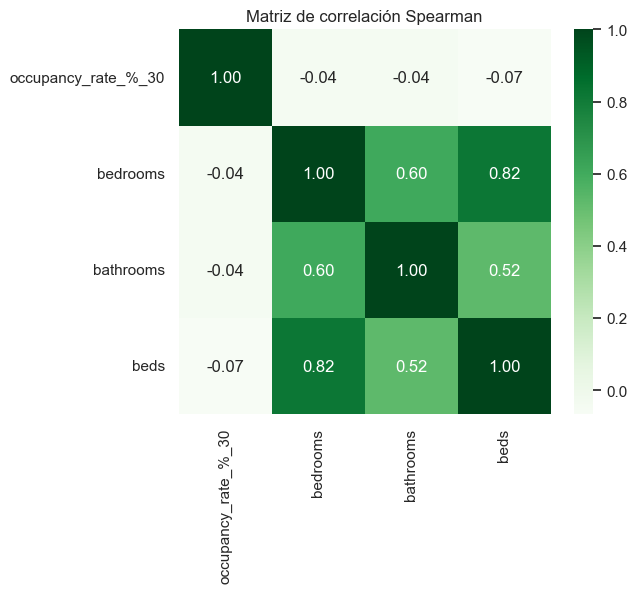

In [72]:
corr_spearman = df[['occupancy_rate_%_30', 'bedrooms', 'bathrooms', 'beds']].corr(method='spearman')
print("Matriz de correlación Spearman:")
print(corr_spearman)

# Opcional: gráfico heatmap con seaborn para visualizar mejor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(corr_spearman, annot=True, cmap='Greens', fmt=".2f")
plt.title('Matriz de correlación Spearman')
plt.show()

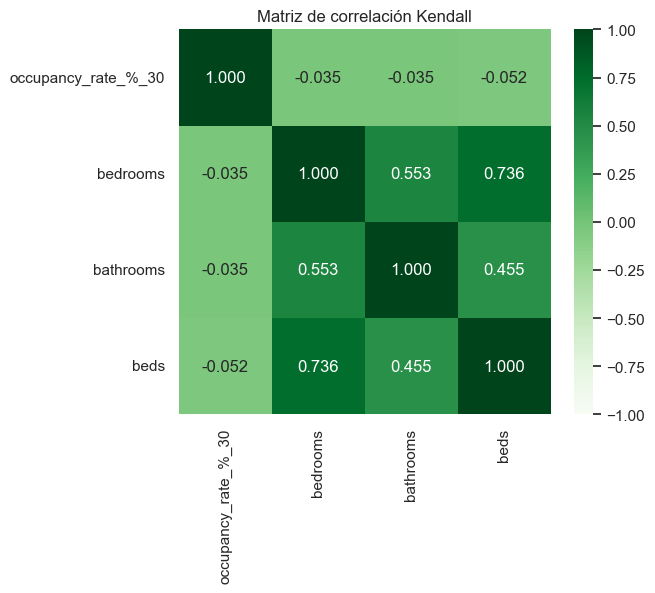

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación Kendall que ya tienes (puedes recalcular si quieres)
corr_kendall = df[['occupancy_rate_%_30', 'bedrooms', 'bathrooms', 'beds']].corr(method='kendall')

plt.figure(figsize=(6,5))
sns.heatmap(corr_kendall, annot=True, cmap='Greens', fmt=".3f", vmin=-1, vmax=1)
plt.title('Matriz de correlación Kendall')
plt.show()

"La correlación de distancia que vemos abajo , que detecta relaciones lineales y no lineales, también muestra valores muy bajos (menores a 0.1), confirmando que no existe una dependencia significativa entre la capacidad del alojamiento y su tasa media de ocupación."

In [74]:
import dcor

variables = ['bedrooms', 'bathrooms', 'beds']
target = 'occupancy_rate_%_30'

for var in variables:
    x = df[var].dropna()
    y = df.loc[x.index, target]
    dist_corr = dcor.distance_correlation(x, y)
    print(f"Distance correlation entre {var} y {target}: {dist_corr:.4f}")

ModuleNotFoundError: No module named 'dcor'

Prueba de Kruskal-Wallis

Es una prueba estadística no paramétrica que se utiliza para comparar tres o más grupos independientes cuando no se cumple el supuesto de normalidad de los datos (es decir, cuando los datos no tienen una distribución normal)


Sirve para verificar si hay diferencias significativas entre las medianas de varios grupos.

Es una alternativa a la ANOVA cuando:

Los datos no son normales (verificamos esto con Shapiro).

O cuando los datos tienen varianzas muy diferentes entre grupos.

No normalidad

Presencia de muchos outliers

Varianzas diferentes entre grupos

In [ ]:
from scipy.stats import kruskal

for var in ['bedrooms', 'bathrooms', 'beds']:
    groups = [group[var].dropna() for name, group in df.groupby('occupancy_level_30')]
    stat, p = kruskal(*groups)

    print("="*40)
    print(f"Kruskal-Wallis for '{var}':")
    print(f"H-statistic = {stat:.2f}")
    print(f"p-value = {p:.4f}")
    
    if p < 0.05:
        print("→ Significant differences between occupancy levels ✅")
    else:
        print("→ No significant differences between occupancy levels ❌")


Kruskal-Wallis for 'bedrooms':
H-statistic = 21.57
p-value = 0.0000
→ Significant differences between occupancy levels ✅
Kruskal-Wallis for 'bathrooms':
H-statistic = 22.67
p-value = 0.0000
→ Significant differences between occupancy levels ✅
Kruskal-Wallis for 'beds':
H-statistic = 37.41
p-value = 0.0000
→ Significant differences between occupancy levels ✅


Generamos tabla resumen

Interpretación:
En general, los alojamientos con menor ocupación tienen más capacidad física (más camas, dormitorios y baños).

A medida que la ocupación es más alta, el tamaño de los alojamientos parece ser más reducido.

Esto podría deberse a que:

Alojamientos más pequeños son más atractivos para estancias cortas o viajeros individuales/parejas.

Propiedades grandes pueden tener precios más altos o estar orientadas a grupos, con menos rotación en 30 días.

In [ ]:
summary = df.groupby('occupancy_level_30')[['bedrooms', 'bathrooms', 'beds']].agg(['mean', 'std']).round(2)
summary


bedrooms       bathrooms        beds      
                       mean   std      mean   std  mean   std
occupancy_level_30                                           
High                   1.87  1.24      1.55  0.94  2.79  2.16
Low                    2.03  1.57      1.66  1.07  3.10  2.42
Medium                 1.93  1.33      1.61  0.94  3.05  2.34

Ahora aplicamos una prueba DUNN ( alternativa a Tukey, se utiliza cuando los dados no son normales) Prueba no parametrica que no asume normalidad.

Usa una corrección por comparaciones múltiples (Bonferroni, Holm, etc.) para controlar el error tipo I.

compara partes de grupos (por ejemplo: High vs Low, High vs Medium, etc.)

indica qué comparaciones son estadísticamente significativas.

PRUEBA DUNN

In [ ]:
import scikit_posthocs as sp

for var in ['bedrooms', 'bathrooms', 'beds']:
    print(f"\nDunn post hoc test for '{var}':")
    dunn_result = sp.posthoc_dunn(df, val_col=var, group_col='occupancy_level_30', p_adjust='bonferroni')
    print(dunn_result)



Dunn post hoc test for 'bedrooms':
            High       Low    Medium
High    1.000000  0.000011  1.000000
Low     0.000011  1.000000  0.210224
Medium  1.000000  0.210224  1.000000

Dunn post hoc test for 'bathrooms':
            High       Low    Medium
High    1.000000  0.000009  0.168945
Low     0.000009  1.000000  1.000000
Medium  0.168945  1.000000  1.000000

Dunn post hoc test for 'beds':
                High           Low    Medium
High    1.000000e+00  1.689502e-08  0.007251
Low     1.689502e-08  1.000000e+00  1.000000
Medium  7.250739e-03  1.000000e+00  1.000000


Solo hay una diferencia significativa en el número de dormitorios entre alojamientos de alta y baja ocupación.
→ Alojamiento con alta ocupación tiene un número de dormitorios distinto al de baja ocupación.

Prueba Tukey nos dice entre cuales grupos hay diferencia


¿Qué podemos concluir?
Hay diferencias claras entre ocupación alta y baja para todas las variables, siendo más marcada en camas.

Para camas también hay diferencia significativa entre alta y media ocupación.

No se detectan diferencias significativas entre ocupación media y baja para ninguna variable.

Esto sugiere que el número de camas disponible es un factor que más se asocia a cambios en la ocupación media.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

for var in ['bedrooms', 'bathrooms', 'beds']:
    # Sacar datos y grupos
    data = df[[var, 'occupancy_level_30']].dropna()
    values = data[var]
    groups = data['occupancy_level_30']
    
    # ANOVA ya la hicimos, ahora Tukey
    tukey = pairwise_tukeyhsd(endog=values, groups=groups, alpha=0.05)
    print(f"\nTukey HSD para '{var}':")
    print(tukey.summary())




Tukey HSD para 'bedrooms':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  High    Low    0.158    0.0  0.0876 0.2284   True
  High Medium    0.059 0.5142 -0.0667 0.1847  False
   Low Medium   -0.099 0.1778 -0.2296 0.0317  False
---------------------------------------------------

Tukey HSD para 'bathrooms':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  High    Low   0.1163    0.0  0.0656  0.167   True
  High Medium   0.0628 0.2353 -0.0278 0.1534  False
   Low Medium  -0.0535  0.377 -0.1477 0.0406  False
---------------------------------------------------

Tukey HSD para 'beds':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  High    Low   0.3119    0.0  0.19

dCor analiza relaciones generales y continuas → No encontró una asociación fuerte.

Pero las pruebas de Kruskal y Dunn/Tukey sí encontraron diferencias significativas entre grupos de ocupación (alta, media, baja) respecto a capacidad.

🧩 Esto sugiere que la capacidad del alojamiento no explica de forma continua la tasa de ocupación, pero sí hay diferencias en la distribución de capacidad entre los grupos de ocupación.

Conclusión clave para el análisis:
Las variables de capacidad (camas, baños, dormitorios) no predicen directamente la ocupación media (no hay una relación de dependencia clara), pero sí se observan diferencias significativas entre niveles de ocupación en cuanto a capacidad.

Esto podría deberse a que la ocupación está influida por muchos factores, y la capacidad es solo uno más, con efecto limitado o indirecto.

PRESENTACION:

Aunque no se detecta una relación de dependencia directa entre la capacidad del alojamiento y la ocupación media (según Distance Correlation), sí existen diferencias significativas entre los niveles de ocupación en cuanto a la cantidad de camas, baños o dormitorios. Esto sugiere que la capacidad podría influir en la ocupación de manera no lineal o en combinación con otros factores.

Prueba Chi-cuadrado verifica Si la distribución de los alojamientos por número de camas/dormitorios/baños es independiente o no del nivel de ocupación (High, Medium, Low)

mide si hay una asociación entre variables categóricas.

 mide si hay una asociación entre variables categóricas, es decir, si la distribución de una categoría cambia dependiendo de la otra. No mide fuerza ni dirección, solo si existe dependencia o independencia.
En nustro caso, categorizamos la ocupación y las variables de camas, baños, etc. en rangos y con la prueba chi-cuadrado vemos que esas categorías no son independientes, hay relación.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_vars = ['beds_cat', 'bathrooms_cat', 'bedrooms_cat']

for var in categorical_vars:
    print(f"\nChi-cuadrado entre '{var}' y 'occupancy_level_30'")
    
    if var not in df.columns:
        base_var = var.replace('_cat', '')
        if base_var in ['bathrooms', 'bedrooms']:
            df[var] = pd.cut(df[base_var], bins=[0, 1, 2, 10], labels=['1', '2', '3+'], right=True)
        elif base_var == 'beds':
            bins_beds = [0, 2, 4, 6, df['beds'].max() + 1]
            labels_beds = ['1-2', '3-4', '5-6', '7+']
            df[var] = pd.cut(df[base_var], bins=bins_beds, labels=labels_beds, right=True)
    
    df_filtered = df[['occupancy_level_30', var]].dropna()
    
    tabla = pd.crosstab(df_filtered['occupancy_level_30'], df_filtered[var])
    
    chi2, p, dof, expected = chi2_contingency(tabla)
    
    print("Estadístico Chi-cuadrado:", round(chi2, 3))
    print("Grados de libertad:", dof)
    print("p-valor:", round(p, 4))
    
    if p < 0.05:
        print("→ Hay asociación significativa ✅")
    else:
        print("→ No hay asociación significativa ❌")




Chi-cuadrado entre 'beds_cat' y 'occupancy_level_30'
Estadístico Chi-cuadrado: 45.238
Grados de libertad: 6
p-valor: 0.0
→ Hay asociación significativa ✅

Chi-cuadrado entre 'bathrooms_cat' y 'occupancy_level_30'
Estadístico Chi-cuadrado: 33.834
Grados de libertad: 4
p-valor: 0.0
→ Hay asociación significativa ✅

Chi-cuadrado entre 'bedrooms_cat' y 'occupancy_level_30'
Estadístico Chi-cuadrado: 14.88
Grados de libertad: 4
p-valor: 0.005
→ Hay asociación significativa ✅


Aunque los coeficientes de correlación y la distancia de correlación eran muy bajos (lo que indicaba que no había relación lineal o no lineal fuerte entre la capacidad y la ocupación), estos resultados de Chi-cuadrado sí revelan que hay dependencia entre las variables.

🔎 Esto implica que la forma en que se distribuyen las categorías de camas, baños o dormitorios sí varía significativamente según el nivel de ocupación, aunque no necesariamente de manera lineal ni proporcional.

 Interpretación práctica para la presentación:
"Aunque no se observó una correlación lineal clara entre la capacidad de los alojamientos y su tasa de ocupación, la prueba de Chi-cuadrado revela que el número de camas, baños y dormitorios influye en el nivel de ocupación de los alojamientos. Es decir, la combinación de características del alojamiento está asociada a si tiene una ocupación alta, media o baja."

### ¿Cómo afecta el número de habitaciones, baños y camas disponibles en la disponibilidad media de los alojamientos? ¿Difiere entre ciudades?

Mostramos la relación entre capacidad del alojamiento y la tasa de Ocupación

Lo que revela el gráfico:
Tendencia general:

A medida que aumenta el número de camas, disminuye el porcentaje de alojamientos con alta ocupación (High).

1–2 camas: 60.07% en alta ocupación.

7+ camas: 48.3% en alta ocupación.

El porcentaje de ocupación baja (Low) aumenta con más camas:

1–2 camas: 32.%.

7+ camas: 43.1%.

Media ocupación (Medium) se mantiene bastante estable (entre 7.3% y 8.6%) y no parece jugar un rol relevante en la diferencia entre categorías.

¿Qué sugiere esto?
Los alojamientos más pequeños (1–2 camas) tienden a tener una mayor tasa de ocupación, probablemente por ser más fáciles de llenar (más atractivos para parejas, viajeros solos o por precio).

Los alojamientos grandes (7+ camas) tienen una mayor proporción de ocupación baja, posiblemente por su menor demanda general o por estar más orientados a grupos grandes (menos frecuentes).






Graficamos + Guardamos graficos en HTML + carpeta local 

In [ ]:
import os
import pandas as pd
import plotly.express as px

# Paleta homogénea para los niveles de ocupación (Low, Medium, High)
paleta_ocupacion = {
    'Low': '#8BAE3F',     # verde claro
    'Medium': '#2D6A4F',  # verde oscuro
    'High': '#6BA292'     # verde intermedio
}

# Categorías personalizadas
df['beds_cat'] = pd.cut(df['beds'], bins=[0, 2, 4, 6, 100], labels=['1-2', '3-4', '5-6', '7+'])
df['bathrooms_cat'] = pd.cut(df['bathrooms'], bins=[0, 1, 2, 10], labels=['1', '2', '3+'])
df['bedrooms_cat'] = pd.cut(df['bedrooms'], bins=[0, 2, 4, 100], labels=['1-2', '3-4', '5+'])

def graficar_stacked(var_cat, titulo, etiqueta_x):
    df_count = df.groupby([var_cat, 'occupancy_level_30']).size().reset_index(name='count')
    df_total = df_count.groupby(var_cat)['count'].transform('sum')
    df_count['percentage'] = (df_count['count'] / df_total * 100).round(1)

    fig = px.bar(
        df_count,
        x=var_cat,
        y='percentage',
        color='occupancy_level_30',
        text='percentage',
        labels={
            var_cat: etiqueta_x,
            'percentage': 'Porcentaje (%)',
            'occupancy_level_30': 'Nivel de Ocupación'
        },
        title=titulo,
        color_discrete_map=paleta_ocupacion
    )

    fig.update_traces(textposition='inside')
    fig.update_layout(barmode='stack', yaxis=dict(range=[0, 100]))

    # Crear carpeta si no existe
    carpeta = r"C:\Users\giuia\ProjecteData\Equip_10\Results\Sprint_3\Graficos HTML OPE"
    os.makedirs(carpeta, exist_ok=True)

    nombre_archivo = os.path.join(carpeta, f"{var_cat}_ocupacion.html")
    fig.write_html(nombre_archivo)

    fig.show()

# Gráficos
graficar_stacked('beds_cat', 'Distribución de ocupación según número de camas', 'Número de camas')
graficar_stacked('bathrooms_cat', 'Distribución de ocupación según número de baños', 'Número de baños')
graficar_stacked('bedrooms_cat', 'Distribución de ocupación según número de dormitorios', 'Número de dormitorios')


In [ ]:
# Conteo de camas por categoría
print("Conteo por categoría de CAMAS:")
print(df['beds_cat'].value_counts().sort_index())
print("\n")

# Conteo de baños por categoría
print("Conteo por categoría de BAÑOS:")
print(df['bathrooms_cat'].value_counts().sort_index())
print("\n")

# Conteo de dormitorios por categoría
print("Conteo por categoría de DORMITORIOS:")
print(df['bedrooms_cat'].value_counts().sort_index())


Conteo por categoría de CAMAS:
beds_cat
1-2    4994
3-4    2669
5-6    1263
7+      603
Name: count, dtype: int64


Conteo por categoría de BAÑOS:
bathrooms_cat
1     5834
2     2691
3+    1098
Name: count, dtype: int64


Conteo por categoría de DORMITORIOS:
bedrooms_cat
1-2    6700
3-4    2286
5+      364
Name: count, dtype: int64


Graficamos + Guardamos graficos en HTML + carpeta local 

In [ ]:
import os
import pandas as pd
import plotly.express as px

# Paleta de colores con 4 tonos verdes
colores_base = ['#8BAE3F', '#2D6A4F', '#6BA292', '#4B7F52']

# Mapeos de color
colores_baths = {
    '1': colores_base[0],
    '2': colores_base[1],
    '3+': colores_base[2]
}

colores_bedrooms = {
    '1-2': colores_base[0],
    '3-4': colores_base[1],
    '5+': colores_base[2]
}

colores_beds = {
    '1-2': colores_base[0],
    '3-4': colores_base[1],
    '5-6': colores_base[2],
    '7+': colores_base[3]
}

# Categorización de variables
df['bathrooms_cat'] = pd.cut(df['bathrooms'], bins=[0, 1, 2, 10], labels=['1', '2', '3+'], right=True)
df['bedrooms_cat'] = pd.cut(df['bedrooms'], bins=[0, 2, 4, 100], labels=['1-2', '3-4', '5+'], right=True)
df['beds_cat'] = pd.cut(df['beds'], bins=[0, 2, 4, 6, df['beds'].max() + 1],
                        labels=['1-2', '3-4', '5-6', '7+'], right=True)

def plot_ocupacion_con_etiquetas(var_cat, titulo, etiqueta_x, color_map):
    df_group = df.groupby(['city', var_cat])['occupancy_rate_%_30'].mean().reset_index()

    fig = px.bar(df_group, x='city', y='occupancy_rate_%_30', color=var_cat,
                 barmode='group',
                 color_discrete_map=color_map,
                 labels={
                     'city': 'Ciudad',
                     'occupancy_rate_%_30': 'Ocupación media (%)',
                     var_cat: etiqueta_x
                 },
                 title=titulo,
                 text=df_group['occupancy_rate_%_30'].round(1).astype(str) + '%'
                )
    fig.update_traces(textposition='outside')
    fig.update_layout(yaxis=dict(range=[0, 110]),
                      uniformtext_minsize=8, uniformtext_mode='hide')
    
    # Mostrar gráfico
    fig.show()
    
    # Guardar el archivo HTML
    carpeta = r"C:\Users\giuia\ProjecteData\Equip_10\Results\Sprint_3\Graficos HTML OPE"
    os.makedirs(carpeta, exist_ok=True)
    nombre_archivo = os.path.join(carpeta, f"{var_cat}_ocupacion_media_ciudad.html")
    fig.write_html(nombre_archivo)

# Generar los tres gráficos
plot_ocupacion_con_etiquetas('bedrooms_cat', 'Ocupación media según dormitorios', 'Dormitorios', colores_bedrooms)
plot_ocupacion_con_etiquetas('bathrooms_cat', 'Ocupación media según baños', 'Baños', colores_baths)
plot_ocupacion_con_etiquetas('beds_cat', 'Ocupación media según número de camas', 'Camas', colores_beds)




Generamos documento con los enlaces de los graficos para poder utilizarlos en la presnentación.

In [ ]:
df.groupby('bedrooms').size()

bedrooms
0.0      300
1.0     4473
2.0     2227
3.0     1549
4.0      737
5.0      227
6.0       89
7.0       17
8.0       16
9.0        4
10.0       3
12.0       4
14.0       2
16.0       1
50.0       1
dtype: int64

In [ ]:
import os

# Ruta local donde están los archivos HTML
carpeta = r"C:\Users\giuia\ProjecteData\Equip_10\Results\Sprint_3\Graficos HTML OPE"

# Base URL para enlace local (file:///)
base_url = "file:///" + carpeta.replace("\\", "/") + "/"

# Listar archivos HTML en la carpeta
archivos = [f for f in os.listdir(carpeta) if f.endswith(".html")]

# Crear contenido HTML con enlaces locales
html_content = """<html>
<head><meta charset="utf-8"><title>Enlaces a gráficos</title></head>
<body>
<h1>Enlaces a gráficos Plotly</h1>
<ul>
"""

for archivo in archivos:
    titulo = archivo.replace(".html", "").replace("_", " ").capitalize()
    enlace = base_url + archivo.replace(" ", "%20")
    html_content += f'<li><a href="{enlace}" target="_blank">{titulo}</a></li>\n'

html_content += """
</ul>
</body>
</html>"""

# Guardar archivo de enlaces en la misma carpeta
ruta_salida = os.path.join(carpeta, "enlaces_graficos.html")
with open(ruta_salida, "w", encoding="utf-8") as f:
    f.write(html_content)

print(f"Archivo generado en: {ruta_salida}")


Archivo generado en: C:\Users\giuia\ProjecteData\Equip_10\Results\Sprint_3\Graficos HTML OPE\enlaces_graficos.html


In [ ]:
df.groupby('beds').size()

beds
0.0      121
1.0     3150
2.0     1844
3.0     1531
4.0     1138
5.0      768
6.0      495
7.0      227
8.0      162
9.0       70
10.0      63
11.0       9
12.0      26
13.0       5
14.0       9
15.0       5
16.0      14
17.0       1
18.0       3
20.0       2
21.0       1
22.0       3
28.0       2
30.0       1
dtype: int64

In [ ]:
df.groupby('bathrooms').size()

bathrooms
0.0       21
1.0     5834
2.0     2691
3.0      652
4.0      263
5.0      103
6.0       43
7.0       18
8.0       13
9.0        5
10.0       1
11.0       2
12.0       3
13.0       1
dtype: int64